# Imports and Function Definitions

## Imports

In [5]:

import os
import math
import numpy as np
import pandas as pd

# Data loading and transformation
import pyreadstat
from scipy.io import arff

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing tools from scikit-learn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Feature selection tools
from sklearn.feature_selection import RFE, SequentialFeatureSelector

# Metrics for model evaluation
import sklearn.metrics as metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, make_scorer,
    ConfusionMatrixDisplay, balanced_accuracy_score
)

# Configure pandas to raise an exception instead of silently downcasting types
pd.set_option('future.no_silent_downcasting', True)

# Function to list all files under the input directory in a Kaggle environment
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Functions

In [33]:
# Function to calculate specificity
def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Function to ensure columns of different datasets are in the same order prior to train/test
def check_and_reorder_columns(df_source, df_target):
    if (df_source.columns == df_target.columns).all():
        print("Columns are the same.")
        return df_target
    else:
        print("Columns are not the same. Reordering...")
        return df_target[df_source.columns]

In [3]:
import math
import numpy as np
import pandas as pd

# Data loading and transformation
import pyreadstat
from scipy.io import arff

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing tools from scikit-learn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Feature selection tools
from sklearn.feature_selection import RFE, SequentialFeatureSelector

# Metrics for model evaluation
import sklearn.metrics as metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, make_scorer,
    ConfusionMatrixDisplay, balanced_accuracy_score
)

# Load / Clean Data

## New Zealand Dataset

In [6]:
# Load file
path = 'E:\\Users\\Prajj\\Documents\\7th Sem\\RM\\Datasets\\Toddler Kaggle Dataset\\Toddler Autism dataset July 2018.csv'
data = pd.read_csv(path)
# data, meta = arff.loadarff(path)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)

# If the data contains byte strings, convert them to regular strings
df = df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Check the shape of the DataFrame before dropping duplicates
print("Shape of DataFrame before dropping duplicates:", df.shape)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
print("Shape of DataFrame after dropping duplicates:", df.shape)

print(df.head())
print(df.describe())
print(df.info())

# Rename misspelled / unclear columns
# family_pdd = direct family member with pervasive developmental disorder
# Five disorders are identified under the category of pervasive developmental disorders: (1) autistic disorder, (2) Rett's disorder, (3) childhood disintegrative disorder, (4) Asperger's syndrome, and (5) pervasive developmental disorder-not otherwise specified, or PDD-NOS (DSM-IV-TR, 2000).

df = df.rename(columns ={
    'A1' : 'A1_Score',
    'A2' : 'A2_Score',
    'A3' : 'A3_Score',
    'A4' : 'A4_Score',
    'A5' : 'A5_Score',
    'A6' : 'A6_Score',
    'A7' : 'A7_Score',
    'A8' : 'A8_Score',
    'A9' : 'A9_Score',
    'A10' : 'A10_Score',
    'Age_Mons' : 'age_months',
    'Class/ASD Traits ' : 'Class/ASD',
    'Family_mem_with_ASD' : 'family_pdd',
    'Jaundice' : 'jaundice',
    'Ethnicity' : 'ethnicity',
    'Qchat-10-Score' : 'result',
    'Sex' : 'gender',
    'Who completed the test' : 'relation'
})

list(df.columns)

Shape of DataFrame before dropping duplicates: (1054, 19)
Shape of DataFrame after dropping duplicates: (1054, 19)
   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White 

['Case_No',
 'A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age_months',
 'result',
 'gender',
 'ethnicity',
 'jaundice',
 'family_pdd',
 'relation',
 'Class/ASD']

In [7]:
# print unique values for each column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

Case_No: [   1    2    3 ... 1052 1053 1054]
A1_Score: [0 1]
A2_Score: [0 1]
A3_Score: [0 1]
A4_Score: [0 1]
A5_Score: [0 1]
A6_Score: [0 1]
A7_Score: [1 0]
A8_Score: [1 0]
A9_Score: [0 1]
A10_Score: [1 0]
age_months: [28 36 24 20 21 33 22 17 25 15 18 12 29 35 32 19 14 13 30 23 34 26 31 27
 16]
result: [ 3  4 10  9  8  5  6  2  0  7  1]
gender: ['f' 'm']
ethnicity: ['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']
jaundice: ['yes' 'no']
family_pdd: ['no' 'yes']
relation: ['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others']
Class/ASD: ['No' 'Yes']


In [8]:
# Replace text objects with boolean values
for column in ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']:  # Add all your column names here
    df[column] = df[column].replace({1: True, 0: False}).infer_objects()

for column in ['jaundice', 'family_pdd']:  # Add all your column names here
    df[column] = df[column].replace({'yes': True, 'no': False}).infer_objects()

df['Class/ASD'] = df['Class/ASD'].replace({'Yes': 1, 'No': 0}).infer_objects()

# Male gender represented as 'True' and female represented as 'False'
df['gender'] = df['gender'].replace({'m': True, 'f': False}).infer_objects()

for column in df.columns:
    print(f"{column}: {df[column].unique()}")

print(df.info())

Case_No: [   1    2    3 ... 1052 1053 1054]
A1_Score: [False  True]
A2_Score: [False  True]
A3_Score: [False  True]
A4_Score: [False  True]
A5_Score: [False  True]
A6_Score: [False  True]
A7_Score: [ True False]
A8_Score: [ True False]
A9_Score: [False  True]
A10_Score: [ True False]
age_months: [28 36 24 20 21 33 22 17 25 15 18 12 29 35 32 19 14 13 30 23 34 26 31 27
 16]
result: [ 3  4 10  9  8  5  6  2  0  7  1]
gender: [False  True]
ethnicity: ['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']
jaundice: [ True False]
family_pdd: [False  True]
relation: ['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others']
Class/ASD: [0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Case_No     1054 non-null   int64 
 1   A1_Score    1054 no

C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\1300762414.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({1: True, 0: False}).infer_objects()
C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\1300762414.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'yes': True, 'no': False}).infer_objects()
C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\1300762414.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ver

Case_No       0
A1_Score      0
A2_Score      0
A3_Score      0
A4_Score      0
A5_Score      0
A6_Score      0
A7_Score      0
A8_Score      0
A9_Score      0
A10_Score     0
age_months    0
result        0
gender        0
ethnicity     0
jaundice      0
family_pdd    0
relation      0
Class/ASD     0
dtype: int64


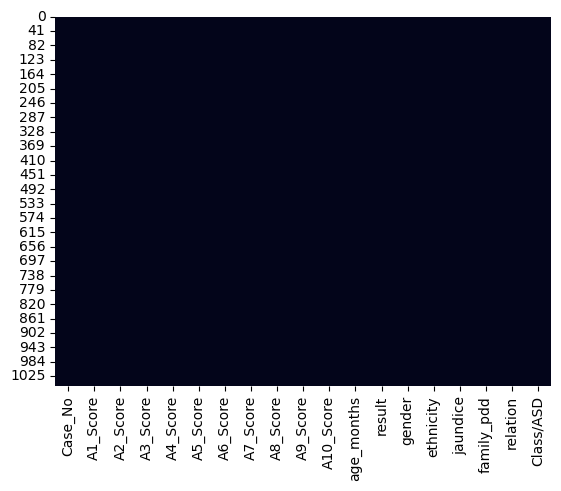

In [9]:
# Find count of null values
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False)

# Calculate the mean of the 'age_months' column
age_months_mean = df['age_months'].mean()

# Fill missing values in 'age_months' with the calculated mean
df['age_months'] = df['age_months'].fillna(age_months_mean)

In [10]:
# drop irrelevant columns / columns not in common between all datasets /
print("Current columns in the DataFrame:", df.columns.tolist())
df_cleaned = df.drop(['Case_No', 'result', 'relation', 'ethnicity', 'jaundice'], axis=1)
df_cleaned.head()

# Check the result
print(df_cleaned.shape)

Current columns in the DataFrame: ['Case_No', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age_months', 'result', 'gender', 'ethnicity', 'jaundice', 'family_pdd', 'relation', 'Class/ASD']
(1054, 14)


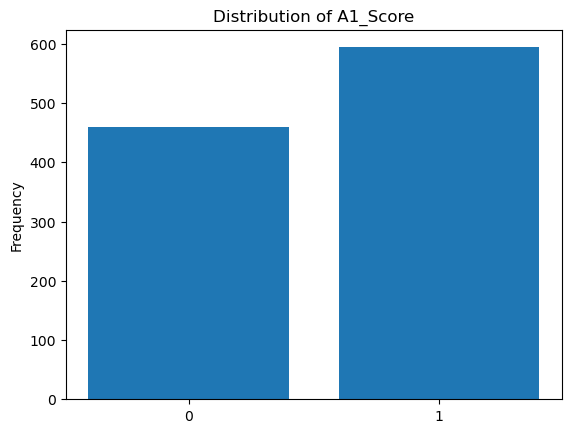

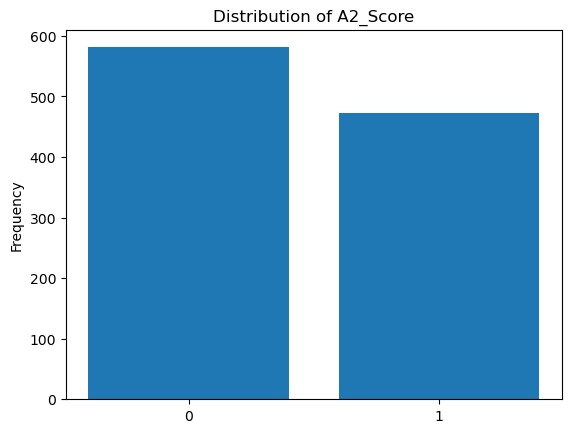

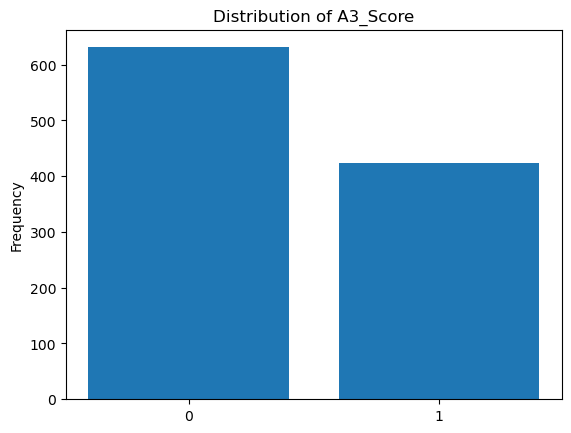

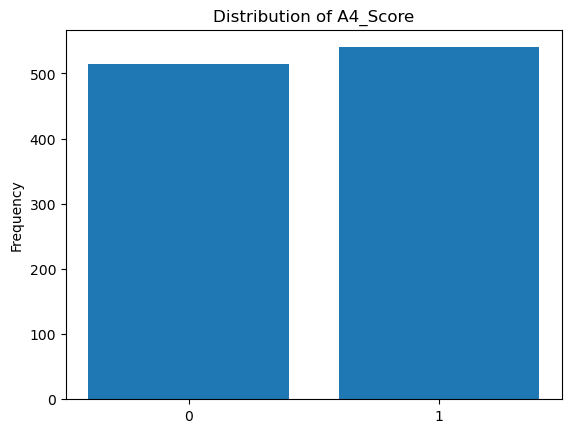

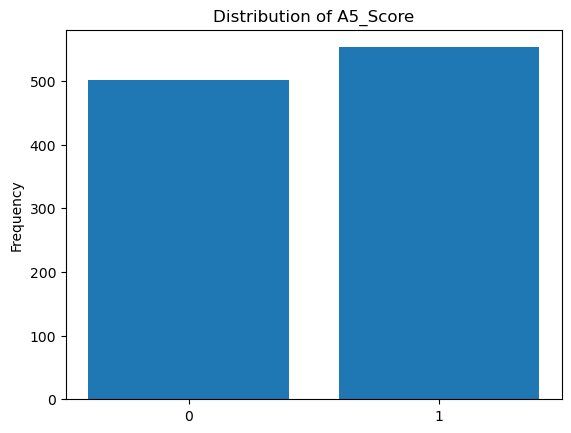

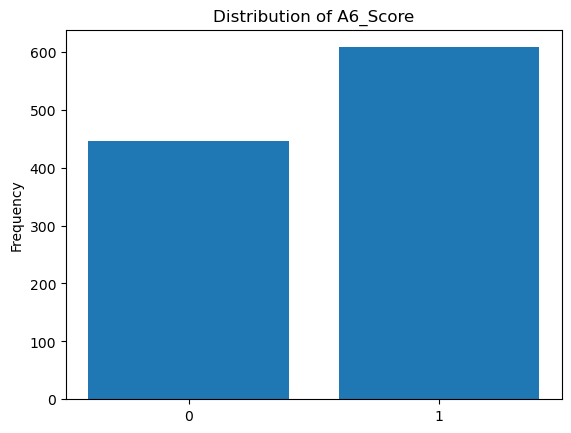

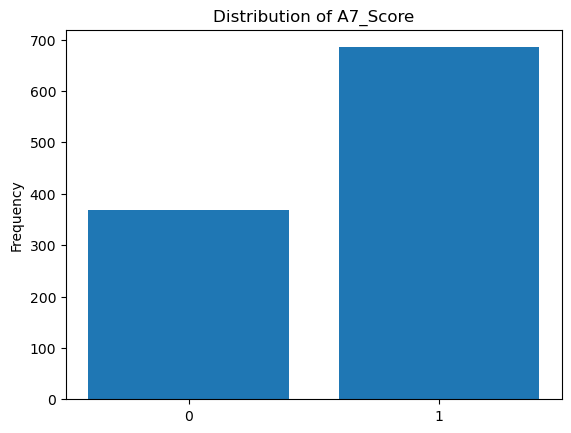

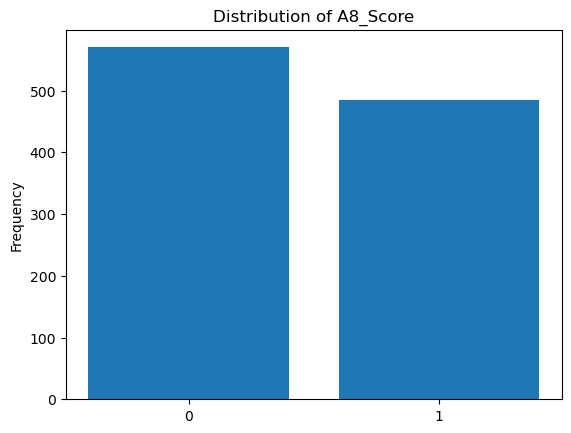

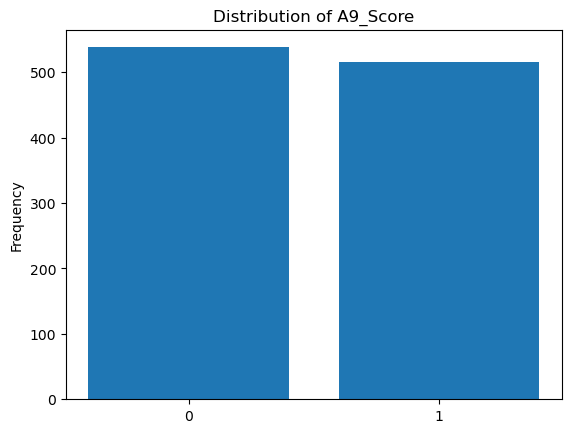

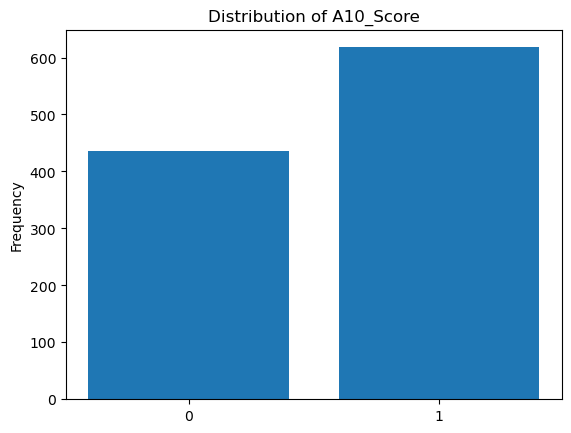

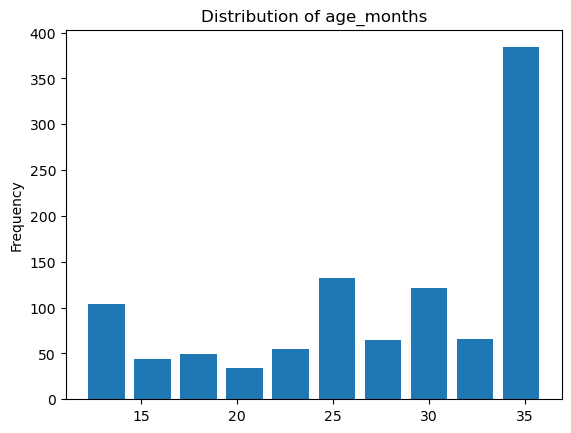

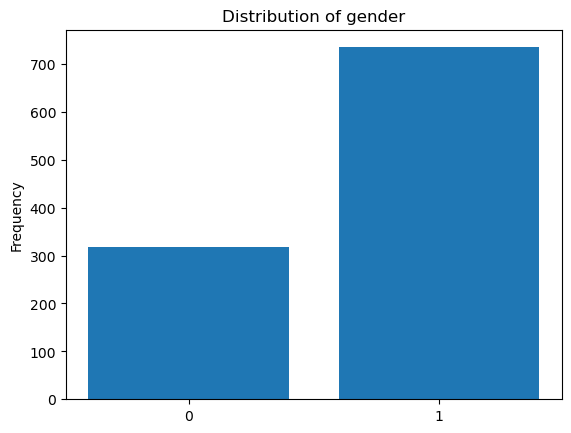

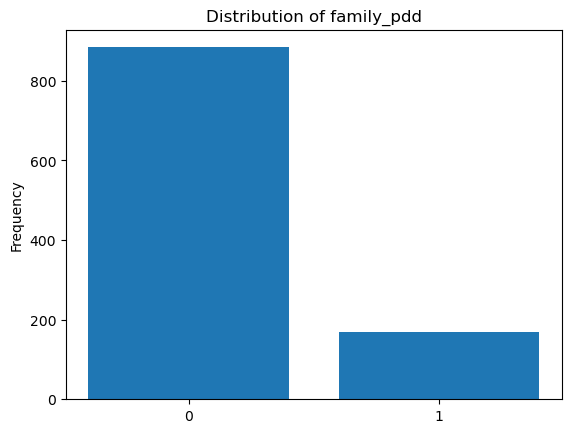

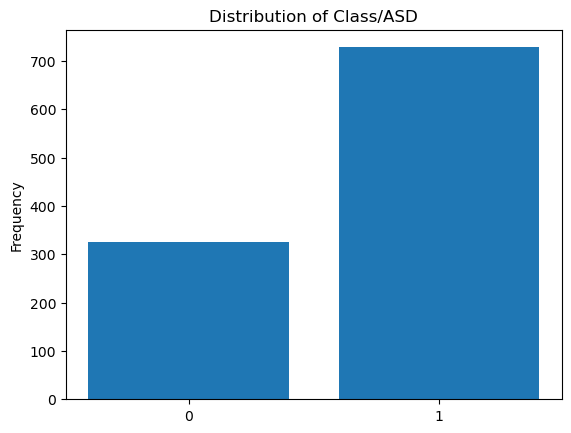

In [11]:
# Iterate over each column in the DataFrame
for column in df_cleaned.columns:
    # Check data type of the column
    if df_cleaned[column].dtype == 'object':  # Categorical data
        # Generate a bar plot for categorical data
        df_cleaned[column].value_counts().plot(kind='bar', title=f'Distribution of {column}')
        plt.xticks(rotation=45)  # Adjust rotation if necessary
    elif df_cleaned[column].dtype == 'bool' or (df_cleaned[column].dtype == 'int64' and df_cleaned[column].nunique() == 2):
        # Handle binary data specially
        df_cleaned[column].astype(int).plot(kind='hist', bins=[-0.5, 0.5, 1.5], title=f'Distribution of {column}', rwidth=0.8)
        plt.xticks([0, 1])  # Set x-ticks specifically for binary data
    elif df_cleaned[column].dtype in ['float64', 'int64']:
        # Handle float and integer data types for non-binary data
        df_cleaned[column].plot(kind='hist', bins=10, title=f'Distribution of {column}', rwidth=0.8)
    else:
        print(f"Skipping {column} as it is not suitable for histogram plotting.")

    plt.show()  # Ensure the plot is shown after each column

In [12]:
class_asd_counts = df_cleaned['Class/ASD'].value_counts()
print(class_asd_counts)

for column in df_cleaned.columns:
    print(f"{column}: {df_cleaned[column].unique()}")

print(df_cleaned.info())

df_cleaned_nz = df_cleaned

Class/ASD
1    728
0    326
Name: count, dtype: int64
A1_Score: [False  True]
A2_Score: [False  True]
A3_Score: [False  True]
A4_Score: [False  True]
A5_Score: [False  True]
A6_Score: [False  True]
A7_Score: [ True False]
A8_Score: [ True False]
A9_Score: [False  True]
A10_Score: [ True False]
age_months: [28 36 24 20 21 33 22 17 25 15 18 12 29 35 32 19 14 13 30 23 34 26 31 27
 16]
gender: [False  True]
family_pdd: [False  True]
Class/ASD: [0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   A1_Score    1054 non-null   bool 
 1   A2_Score    1054 non-null   bool 
 2   A3_Score    1054 non-null   bool 
 3   A4_Score    1054 non-null   bool 
 4   A5_Score    1054 non-null   bool 
 5   A6_Score    1054 non-null   bool 
 6   A7_Score    1054 non-null   bool 
 7   A8_Score    1054 non-null   bool 
 8   A9_Score    1054 non-null   bool 
 9   A10_Score

## Polish Dataset

In [13]:
# load polish dataset
df, meta = pyreadstat.read_sav('E:\\Users\\Prajj\\Documents\\7th Sem\\RM\\Datasets\\Polish Dataset\\Polish Dataset_csv.sav')

# Check the shape of the DataFrame before dropping duplicates
print("Shape of DataFrame before dropping duplicates:", df.shape)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
print("Shape of DataFrame after dropping duplicates:", df.shape)

print(df.head())
print(df.describe())
print(df.info())

df = df.rename(columns ={
    'qchat1recode' : 'A1_Score',
    'qchat2recode' : 'A2_Score',
    'qchat5recode' : 'A3_Score',
    'qchat6recode' : 'A4_Score',
    'qchat9recode' : 'A5_Score',
    'qchat10recode' : 'A6_Score',
    'qchat15recode' : 'A7_Score',
    'qchat17recode' : 'A8_Score',
    'qchat19recode' : 'A9_Score',
    'qchat25recode' : 'A10_Score',
    'age' : 'age_months',
    'group' : 'Class/ASD',
    'sibling_withASD' : 'family_pdd',
    'Ethnicity' : 'ethnicity',
    'Sum_QCHAT' : 'result',
    'sex' : 'gender'
})

list(df.columns)

Shape of DataFrame before dropping duplicates: (252, 36)
Shape of DataFrame after dropping duplicates: (252, 36)
  child_id   age  sex  group  preterm  birthweight  siblings_yesno  \
0      220  18.0  1.0    1.0      1.0       1500.0             0.0   
1  FS/1642  18.0  1.0    1.0      1.0       1700.0             0.0   
2      340  18.0  1.0    1.0      1.0       1820.0             0.0   
3  FS/2571  18.0  1.0    1.0      1.0       1820.0             0.0   
4      236  18.0  1.0    1.0      1.0       2360.0             1.0   

   siblings_number  mothers_education  sibling_withASD  ...  qchat16recode  \
0              0.0                2.0              0.0  ...            2.0   
1              0.0                3.0              0.0  ...            0.0   
2              0.0                3.0              0.0  ...            0.0   
3              0.0                3.0              0.0  ...            3.0   
4              1.0                3.0              1.0  ...            0.0  

['child_id',
 'age_months',
 'gender',
 'Class/ASD',
 'preterm',
 'birthweight',
 'siblings_yesno',
 'siblings_number',
 'mothers_education',
 'family_pdd',
 'result',
 'A1_Score',
 'A2_Score',
 'qchat3recode',
 'qchat4recode',
 'A3_Score',
 'A4_Score',
 'qchat7recode',
 'qchat8recode',
 'A5_Score',
 'A6_Score',
 'qchat11recode',
 'qchat12recode',
 'qchat13recode',
 'qchat14recode',
 'A7_Score',
 'qchat16recode',
 'A8_Score',
 'qchat18recode',
 'A9_Score',
 'qchat20recode',
 'qchat21recode',
 'qchat22recode',
 'qchat23recode',
 'qchat24recode',
 'A10_Score']

In [14]:
# print unique values for each column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

child_id: ['220' 'FS/1642' '340' 'FS/2571' '236' 'FS/1736' 'FS/2178' '219' 'FS/2357'
 'FS/2347' '193' 'FS/1729' 'FS/2059' 'FS/1824' 'FS/2536' 'FS/2641' '253'
 '252' '2552' 'FS/2271' 'FS/2432' 'FS/1776' 'FS/2263' '263' 'FS/1850'
 'FS/1719' 'bdbp0196' 'bdbp0461' 'bdbp0169' 'FS/2230' 'FS/2582' 'bdbp0080'
 'bdbp0485' 'bdbp0103' 'bdbp0097' 'FS/2209' '277' 'FS/1705' '238'
 'FS/2796' '237' 'FS/2202' '190' 'FS/1746' 'FS/1873' 'FS/2511' 'FS/1786'
 'FS/1599' 'FS/2802' 'FS/1943' '4' '115' 'FS/1966' 'FS/2435' 'FS/2611'
 'FS/1892' '233' 'FS/2331' 'A64' 'bdbp0235' 'bdbp0221' 'bdbp0619'
 'bdbp0116' 'FS/2277' 'bdbp0299' 'bdbp0462' 'FS/2276' 'bdbp0159' '10' '56'
 'FS/2346' 'FS/2806' 'FS/2762' 'FS/2948' '308' '255' '205' '19' 'FS/2031'
 'FS/1846' 'FS/2778' '6' 'FS/2687' 'FS/2901' 'FS/2742' 'FS/1787' '312'
 'FS/1804' 'FS/2514' 'FS/2604' 'FS/1706' 'FS/2494' 'FS/2157' 'FS/1693'
 'FS/2191' 'bdbp0476' 'bdbp0340' 'bdbp0176' 'bdbp0427' 'bdbp0499' '43'
 'bdbp0442' '239' 'bdbp0282' 'bdbp0559' 'FS/1768' 'FS/2627'

In [15]:
# Replace text objects with boolean values
#for column in ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score']:  # Add all your column names here
#    df[column] = df[column].replace({4: False, 3: False, 2:True, 1: True, 0:True}).infer_objects()
# Update A10 scoring to reflect the New Zealand dataset
for column in ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score']:  # Add all your column names here
    df[column] = df[column].replace({4: True, 3: True, 2:True, 1: False, 0:False}).infer_objects()
df['A10_Score'] = df['A10_Score'].replace({4: True, 3: True, 2:True, 1: False, 0:False}).infer_objects()

# for column in ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score']:  # Add all your column names here
#     df[column] = df[column].replace({4: False, 3: False, 2:True, 1: True, 0:True}).infer_objects()

for column in ['family_pdd']:  # Add all your column names here
    df[column] = df[column].replace({1: True, 0: False, math.nan:False}).infer_objects()

df['Class/ASD'] = df['Class/ASD'].replace({1: 1, 7: 0}).infer_objects()

# Male gender represented as 'True' and female represented as 'False'
df['gender'] = df['gender'].replace({1: True, 2: False}).infer_objects()

for column in df.columns:
    print(f"{column}: {df[column].unique()}")

print(df.info())

child_id: ['220' 'FS/1642' '340' 'FS/2571' '236' 'FS/1736' 'FS/2178' '219' 'FS/2357'
 'FS/2347' '193' 'FS/1729' 'FS/2059' 'FS/1824' 'FS/2536' 'FS/2641' '253'
 '252' '2552' 'FS/2271' 'FS/2432' 'FS/1776' 'FS/2263' '263' 'FS/1850'
 'FS/1719' 'bdbp0196' 'bdbp0461' 'bdbp0169' 'FS/2230' 'FS/2582' 'bdbp0080'
 'bdbp0485' 'bdbp0103' 'bdbp0097' 'FS/2209' '277' 'FS/1705' '238'
 'FS/2796' '237' 'FS/2202' '190' 'FS/1746' 'FS/1873' 'FS/2511' 'FS/1786'
 'FS/1599' 'FS/2802' 'FS/1943' '4' '115' 'FS/1966' 'FS/2435' 'FS/2611'
 'FS/1892' '233' 'FS/2331' 'A64' 'bdbp0235' 'bdbp0221' 'bdbp0619'
 'bdbp0116' 'FS/2277' 'bdbp0299' 'bdbp0462' 'FS/2276' 'bdbp0159' '10' '56'
 'FS/2346' 'FS/2806' 'FS/2762' 'FS/2948' '308' '255' '205' '19' 'FS/2031'
 'FS/1846' 'FS/2778' '6' 'FS/2687' 'FS/2901' 'FS/2742' 'FS/1787' '312'
 'FS/1804' 'FS/2514' 'FS/2604' 'FS/1706' 'FS/2494' 'FS/2157' 'FS/1693'
 'FS/2191' 'bdbp0476' 'bdbp0340' 'bdbp0176' 'bdbp0427' 'bdbp0499' '43'
 'bdbp0442' '239' 'bdbp0282' 'bdbp0559' 'FS/1768' 'FS/2627'

C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\1660526556.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({4: True, 3: True, 2:True, 1: False, 0:False}).infer_objects()
C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\1660526556.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A10_Score'] = df['A10_Score'].replace({4: True, 3: True, 2:True, 1: False, 0:False}).infer_objects()
C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\1660526556.py:13: FutureWarning: Downcasting behavior in `re

child_id              0
age_months            0
gender                0
Class/ASD             0
preterm               0
birthweight          12
siblings_yesno        5
siblings_number      23
mothers_education    11
family_pdd            0
result                0
A1_Score              0
A2_Score              0
qchat3recode          0
qchat4recode          0
A3_Score              0
A4_Score              0
qchat7recode          0
qchat8recode          0
A5_Score              0
A6_Score              0
qchat11recode         0
qchat12recode         0
qchat13recode         0
qchat14recode         0
A7_Score              0
qchat16recode         0
A8_Score              0
qchat18recode         0
A9_Score              0
qchat20recode         0
qchat21recode         0
qchat22recode         0
qchat23recode         0
qchat24recode         0
A10_Score             0
dtype: int64


<Axes: >

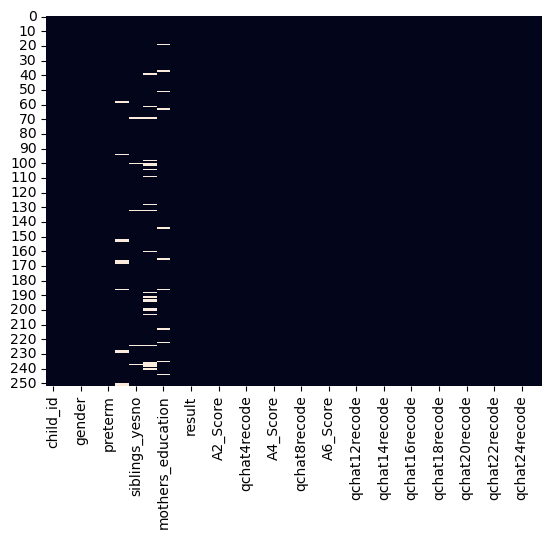

In [16]:
# Find count of null values
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False)

In [17]:
# drop irrelevant columns and columns not shared with the other dataset
print("Current columns in the DataFrame:", df.columns.tolist())
df_cleaned = df.drop(['child_id', 'preterm', 'birthweight', 'result', 'siblings_yesno', 'siblings_number', 'mothers_education', 'qchat13recode', 'qchat21recode', 'qchat23recode', 'qchat3recode', 'qchat7recode', 'qchat11recode', 'qchat4recode', 'qchat8recode', 'qchat12recode', 'qchat14recode', 'qchat18recode', 'qchat16recode', 'qchat20recode', 'qchat22recode', 'qchat24recode'], axis=1)
df_cleaned.head()

# Check the result
print(df_cleaned.shape)
print("Current columns in the DataFrame:", df_cleaned.columns.tolist())

Current columns in the DataFrame: ['child_id', 'age_months', 'gender', 'Class/ASD', 'preterm', 'birthweight', 'siblings_yesno', 'siblings_number', 'mothers_education', 'family_pdd', 'result', 'A1_Score', 'A2_Score', 'qchat3recode', 'qchat4recode', 'A3_Score', 'A4_Score', 'qchat7recode', 'qchat8recode', 'A5_Score', 'A6_Score', 'qchat11recode', 'qchat12recode', 'qchat13recode', 'qchat14recode', 'A7_Score', 'qchat16recode', 'A8_Score', 'qchat18recode', 'A9_Score', 'qchat20recode', 'qchat21recode', 'qchat22recode', 'qchat23recode', 'qchat24recode', 'A10_Score']
(252, 14)
Current columns in the DataFrame: ['age_months', 'gender', 'Class/ASD', 'family_pdd', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']


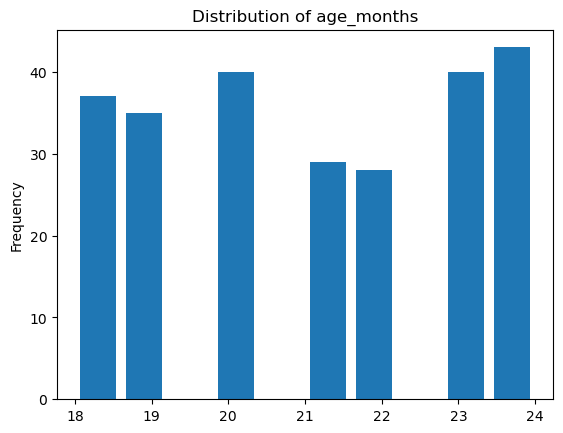

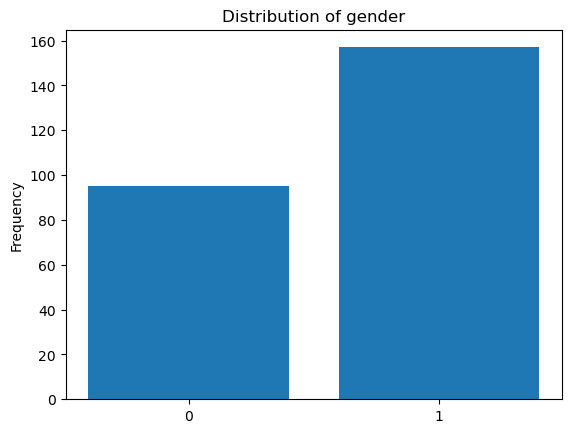

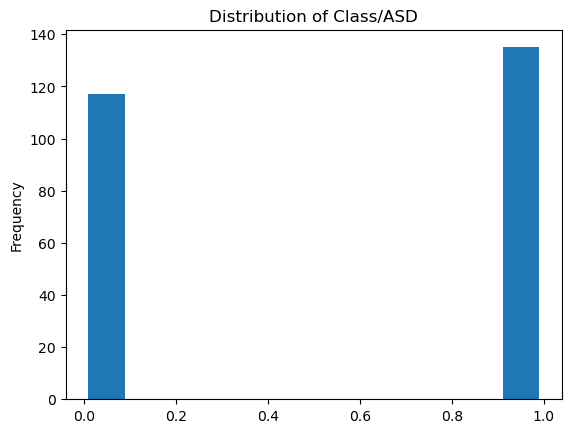

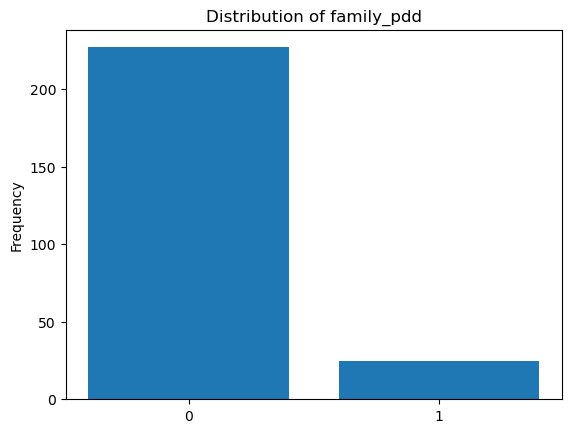

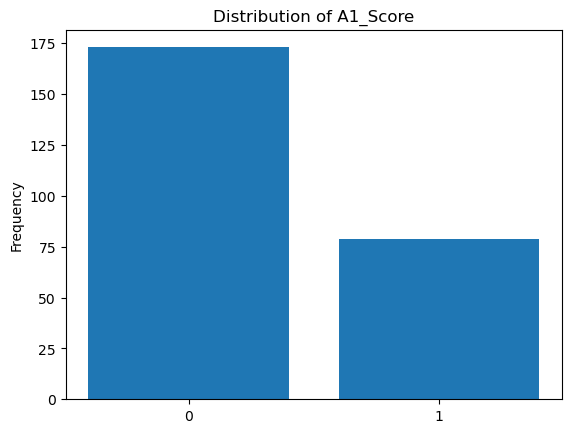

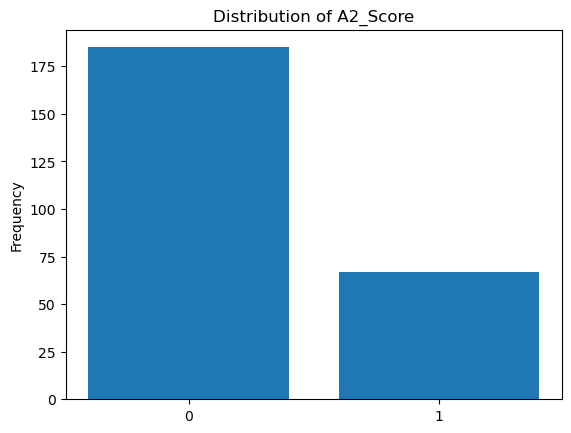

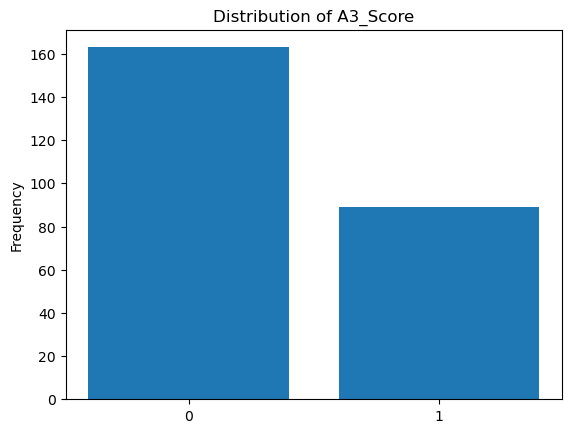

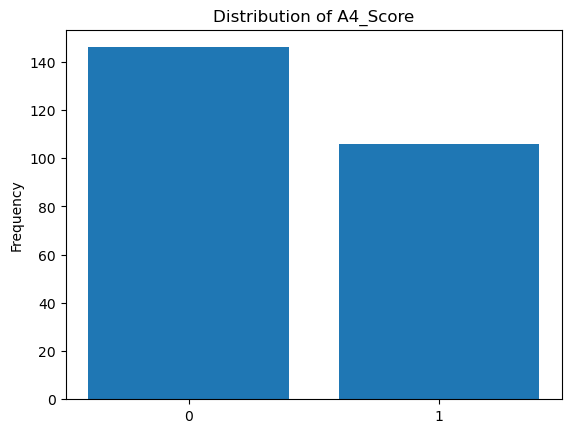

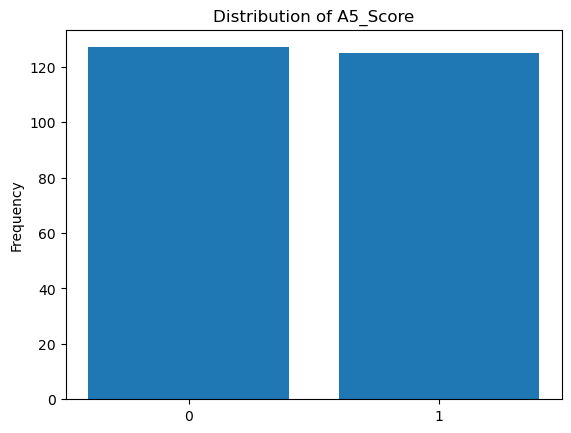

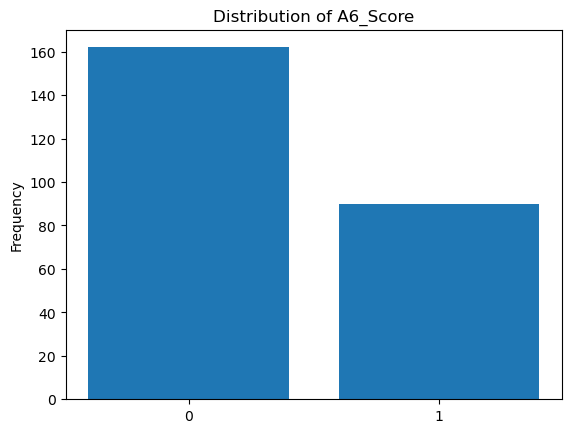

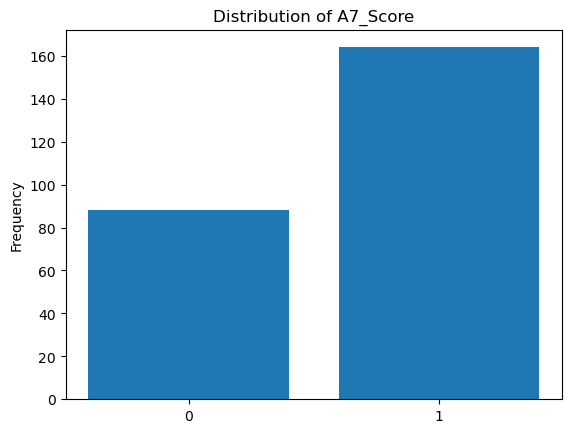

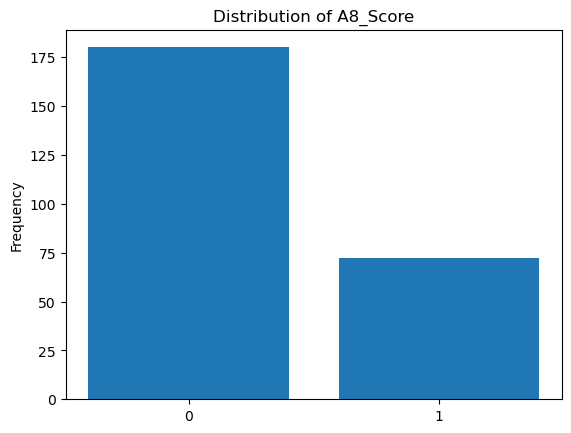

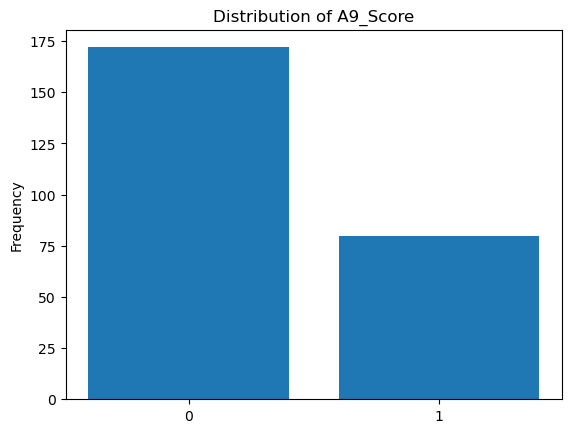

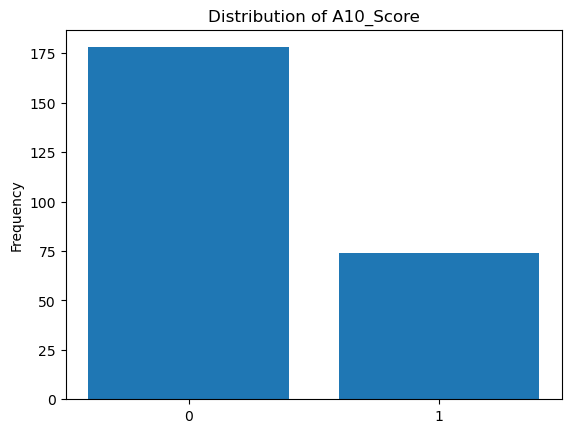

In [18]:
# Iterate over each column in the DataFrame
for column in df_cleaned.columns:
    # Check data type of the column
    if df_cleaned[column].dtype == 'object':  # Categorical data
        # Generate a bar plot for categorical data
        df_cleaned[column].value_counts().plot(kind='bar', title=f'Distribution of {column}')
        plt.xticks(rotation=45)  # Adjust rotation if necessary
    elif df_cleaned[column].dtype == 'bool' or (df_cleaned[column].dtype == 'int64' and df_cleaned[column].nunique() == 2):
        # Handle binary data specially
        df_cleaned[column].astype(int).plot(kind='hist', bins=[-0.5, 0.5, 1.5], title=f'Distribution of {column}', rwidth=0.8)
        plt.xticks([0, 1])  # Set x-ticks specifically for binary data
    elif df_cleaned[column].dtype in ['float64', 'int64']:
        # Handle float and integer data types for non-binary data
        df_cleaned[column].plot(kind='hist', bins=10, title=f'Distribution of {column}', rwidth=0.8)
    else:
        print(f"Skipping {column} as it is not suitable for histogram plotting.")

    plt.show()  # Ensure the plot is shown after each column

In [19]:
# drop irrelevant columns and columns not shared with the other dataset
print("Current columns in the DataFrame:", df.columns.tolist())
df_cleaned = df.drop(['child_id', 'preterm', 'birthweight', 'result', 'siblings_yesno', 'siblings_number', 'mothers_education', 'qchat13recode', 'qchat21recode', 'qchat23recode', 'qchat3recode', 'qchat7recode', 'qchat11recode', 'qchat4recode', 'qchat8recode', 'qchat12recode', 'qchat14recode', 'qchat18recode', 'qchat16recode', 'qchat20recode', 'qchat22recode', 'qchat24recode'], axis=1)
df_cleaned.head()

# Check the result
print(df_cleaned.shape)
print("Current columns in the DataFrame:", df_cleaned.columns.tolist())

Current columns in the DataFrame: ['child_id', 'age_months', 'gender', 'Class/ASD', 'preterm', 'birthweight', 'siblings_yesno', 'siblings_number', 'mothers_education', 'family_pdd', 'result', 'A1_Score', 'A2_Score', 'qchat3recode', 'qchat4recode', 'A3_Score', 'A4_Score', 'qchat7recode', 'qchat8recode', 'A5_Score', 'A6_Score', 'qchat11recode', 'qchat12recode', 'qchat13recode', 'qchat14recode', 'A7_Score', 'qchat16recode', 'A8_Score', 'qchat18recode', 'A9_Score', 'qchat20recode', 'qchat21recode', 'qchat22recode', 'qchat23recode', 'qchat24recode', 'A10_Score']
(252, 14)
Current columns in the DataFrame: ['age_months', 'gender', 'Class/ASD', 'family_pdd', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']


In [20]:
class_asd_counts = df_cleaned['Class/ASD'].value_counts()
print(class_asd_counts)

for column in df_cleaned.columns:
    print(f"{column}: {df_cleaned[column].unique()}")

print(df_cleaned.info())

df_cleaned_polish = df_cleaned

Class/ASD
1.0    135
0.0    117
Name: count, dtype: int64
age_months: [18. 19. 20. 21. 22. 23. 24.]
gender: [ True False]
Class/ASD: [1. 0.]
family_pdd: [False  True]
A1_Score: [ True False]
A2_Score: [ True False]
A3_Score: [ True False]
A4_Score: [ True False]
A5_Score: [ True False]
A6_Score: [ True False]
A7_Score: [ True False]
A8_Score: [ True False]
A9_Score: [ True False]
A10_Score: [False  True]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age_months  252 non-null    float64
 1   gender      252 non-null    bool   
 2   Class/ASD   252 non-null    float64
 3   family_pdd  252 non-null    bool   
 4   A1_Score    252 non-null    bool   
 5   A2_Score    252 non-null    bool   
 6   A3_Score    252 non-null    bool   
 7   A4_Score    252 non-null    bool   
 8   A5_Score    252 non-null    bool   
 9   A6_Score    252 non-null    boo

## Saudi Dataset

In [21]:
# Load file
path = "E:\\Users\\Prajj\\Documents\\7th Sem\\RM\\Datasets\\Saudi Dataset Toddlers\\Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv"
data = pd.read_csv(path)
# data, meta = arff.loadarff(path)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)

# If the data contains byte strings, convert them to regular strings
df = df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Check the shape of the DataFrame before dropping duplicates
print("Shape of DataFrame before dropping duplicates:", df.shape)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
print("Shape of DataFrame after dropping duplicates:", df.shape)

print(df.head())
print(df.describe())
print(df.info())

# Rename misspelled / unclear columns
# family_pdd = direct family member with pervasive developmental disorder
# Five disorders are identified under the category of pervasive developmental disorders: (1) autistic disorder, (2) Rett's disorder, (3) childhood disintegrative disorder, (4) Asperger's syndrome, and (5) pervasive developmental disorder-not otherwise specified, or PDD-NOS (DSM-IV-TR, 2000).

df = df.rename(columns ={
    'A1' : 'A1_Score',
    'A2' : 'A2_Score',
    'A3' : 'A3_Score',
    'A4' : 'A4_Score',
    'A5' : 'A5_Score',
    'A6' : 'A6_Score',
    'A7' : 'A7_Score',
    'A8' : 'A8_Score',
    'A9' : 'A9_Score',
    'A10' : 'A10_Score',
    'Age' : 'age_months',
    'Class' : 'Class/ASD',
    'Family member with ASD history' : 'family_pdd',
    'Jaundice' : 'jaundice',
    'Ethnicity' : 'ethnicity',
    'Screening Score' : 'result',
    'Gender' : 'gender',
    'Who is completing the test' : 'relation'
})

list(df.columns)

Shape of DataFrame before dropping duplicates: (506, 17)
Shape of DataFrame after dropping duplicates: (481, 17)
   A10  A9  A8  A7  A6  A5  A4  A3  A2  A1            Region  \
0    0   0   1   1   1   0   0   0   0   0   Makkah Province   
1    0   0   1   0   0   1   0   1   0   0   Makkah Province   
2    0   0   0   1   0   0   0   0   0   0   Makkah Province   
3    0   0   0   0   0   0   0   0   0   0   Makkah Province   
4    0   0   0   0   0   0   0   0   0   0  Eastern Province   

  Family member with ASD history Who is completing the test  Age  Gender  \
0                             No              Family member   32  Female   
1                             No              Family member   30  Female   
2                             No              Family member   36    Male   
3                            Yes              Family member   36  Female   
4                             No              Family member   36  Female   

   Screening Score  Class  
0                

['A10_Score',
 'A9_Score',
 'A8_Score',
 'A7_Score',
 'A6_Score',
 'A5_Score',
 'A4_Score',
 'A3_Score',
 'A2_Score',
 'A1_Score',
 'Region',
 'family_pdd',
 'relation',
 'age_months',
 'gender',
 'result',
 'Class/ASD']

In [22]:
# print unique values for each column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

A10_Score: [0 1]
A9_Score: [0 1]
A8_Score: [1 0]
A7_Score: [1 0]
A6_Score: [1 0]
A5_Score: [0 1]
A4_Score: [0 1]
A3_Score: [0 1]
A2_Score: [0 1]
A1_Score: [0 1]
Region: ['Makkah Province' 'Eastern Province' 'Madinah Province' 'Aseer Province'
 'Riyadh Province' 'Jizan Province' 'Northern Borders Province'
 "Ha'il Province" 'Qassim Province' 'Tabuk Province' 'Al Jawf Province'
 'Najran Province' 'Al Baha Province']
family_pdd: ['No' 'Yes']
relation: ['Family member' 'Other']
age_months: [32 30 36 17 18 24 26 28 14 15 12 16 20 34 13 22 25 33 29 27 35 19 21 23
 31]
gender: ['Female' 'Male']
result: [ 3  1  0  4  6  2  9  8  5  7 10]
Class/ASD: [0 1]


In [23]:
# Replace text objects with boolean values
for column in ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']:  # Add all your column names here
    df[column] = df[column].replace({1: True, 0: False}).infer_objects()

for column in ['family_pdd']:  # Add all your column names here
    df[column] = df[column].replace({'Yes': True, 'No': False}).infer_objects()

df['Class/ASD'] = df['Class/ASD'].replace({1: 1, 0: 0}).infer_objects()

# Male gender represented as 'True' and female represented as 'False'
df['gender'] = df['gender'].replace({'Male': True, 'Female': False}).infer_objects()

for column in df.columns:
    print(f"{column}: {df[column].unique()}")

print(df.info())

A10_Score: [False  True]
A9_Score: [False  True]
A8_Score: [ True False]
A7_Score: [ True False]
A6_Score: [ True False]
A5_Score: [False  True]
A4_Score: [False  True]
A3_Score: [False  True]
A2_Score: [False  True]
A1_Score: [False  True]
Region: ['Makkah Province' 'Eastern Province' 'Madinah Province' 'Aseer Province'
 'Riyadh Province' 'Jizan Province' 'Northern Borders Province'
 "Ha'il Province" 'Qassim Province' 'Tabuk Province' 'Al Jawf Province'
 'Najran Province' 'Al Baha Province']
family_pdd: [False  True]
relation: ['Family member' 'Other']
age_months: [32 30 36 17 18 24 26 28 14 15 12 16 20 34 13 22 25 33 29 27 35 19 21 23
 31]
gender: [False  True]
result: [ 3  1  0  4  6  2  9  8  5  7 10]
Class/ASD: [0 1]
<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 0 to 505
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A10_Score   481 non-null    bool  
 1   A9_Score    481 non-null    bool  
 2   A8_

C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\2137928575.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({1: True, 0: False}).infer_objects()
C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\2137928575.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'Yes': True, 'No': False}).infer_objects()
C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\2137928575.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ve

A10_Score     0
A9_Score      0
A8_Score      0
A7_Score      0
A6_Score      0
A5_Score      0
A4_Score      0
A3_Score      0
A2_Score      0
A1_Score      0
Region        0
family_pdd    0
relation      0
age_months    0
gender        0
result        0
Class/ASD     0
dtype: int64


<Axes: >

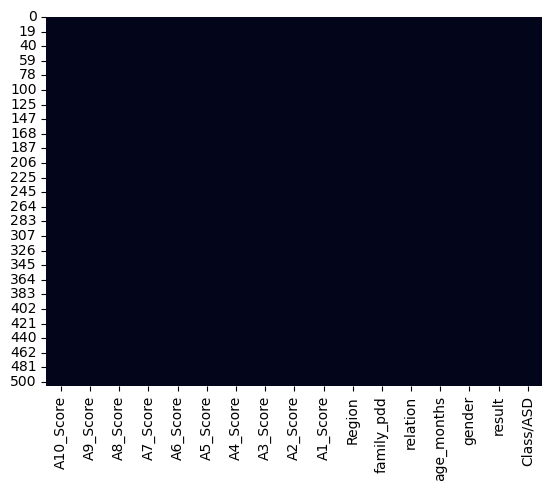

In [24]:
# Find count of null values
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False)

In [25]:
# drop irrelevant columns and columns not shared with the other dataset
print("Current columns in the DataFrame:", df.columns.tolist())
df_cleaned = df.drop(['result', 'Region', 'relation'], axis=1)
df_cleaned.head()

# Check the result
print(df_cleaned.shape)
print("Current columns in the DataFrame:", df_cleaned.columns.tolist())

Current columns in the DataFrame: ['A10_Score', 'A9_Score', 'A8_Score', 'A7_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A2_Score', 'A1_Score', 'Region', 'family_pdd', 'relation', 'age_months', 'gender', 'result', 'Class/ASD']
(481, 14)
Current columns in the DataFrame: ['A10_Score', 'A9_Score', 'A8_Score', 'A7_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A2_Score', 'A1_Score', 'family_pdd', 'age_months', 'gender', 'Class/ASD']


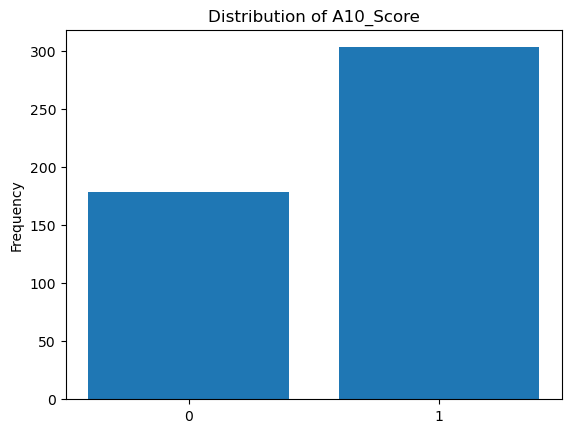

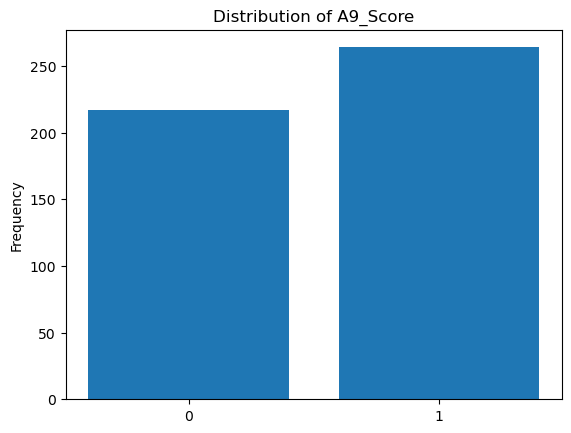

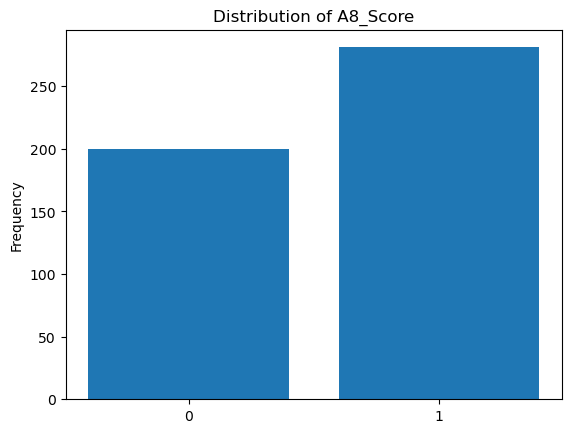

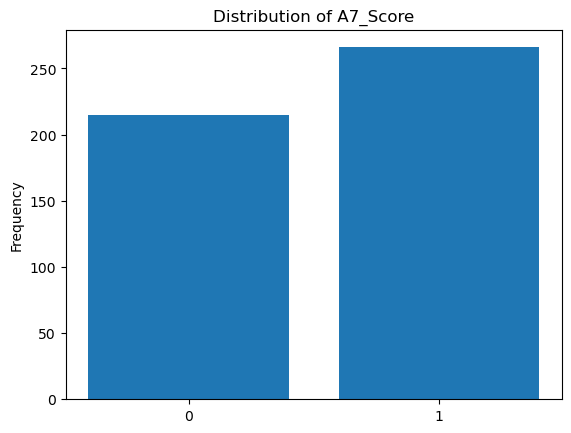

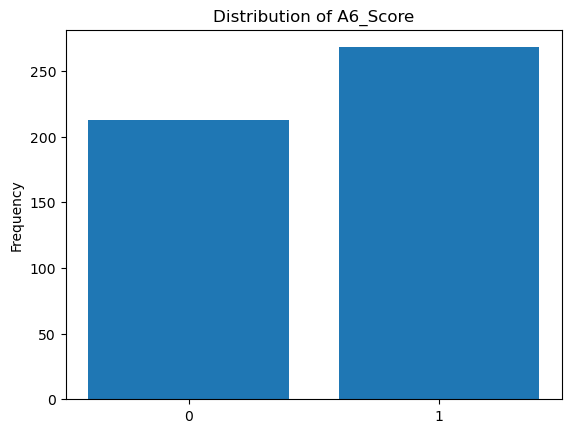

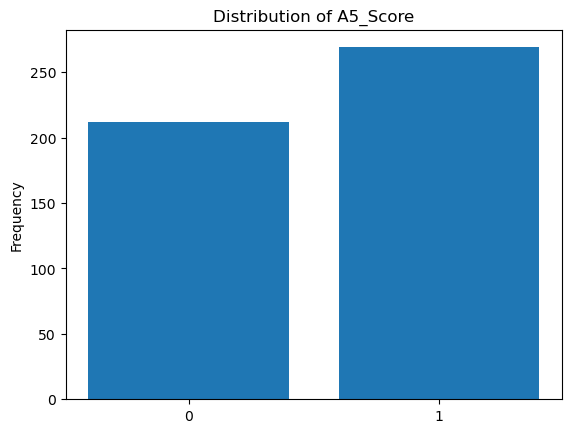

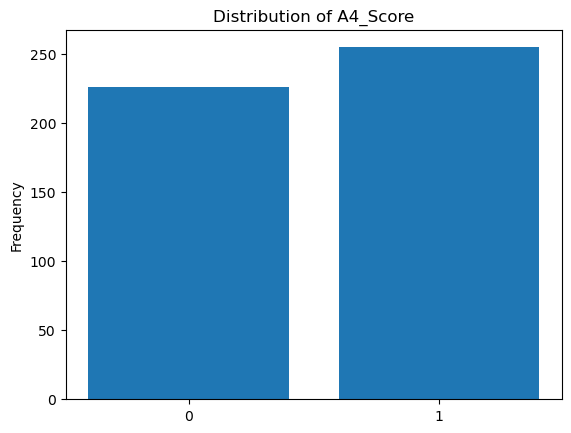

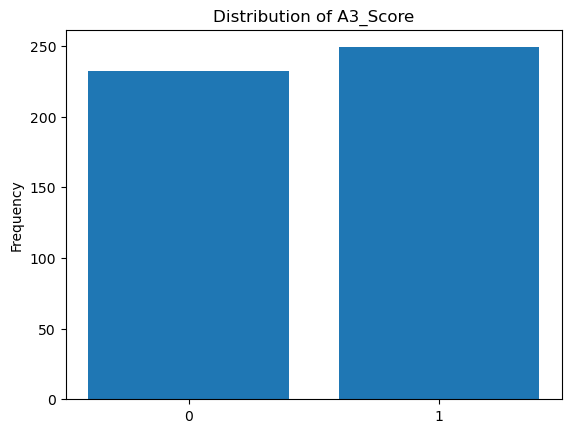

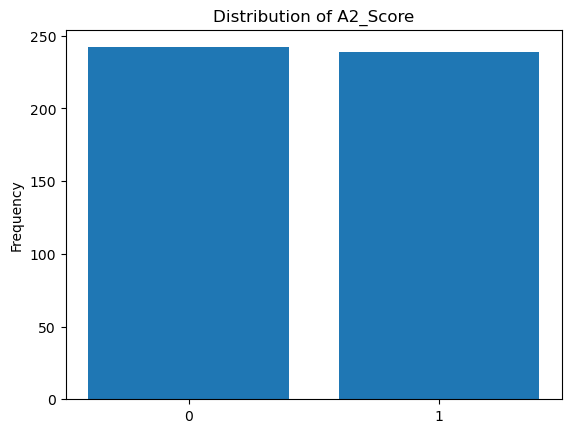

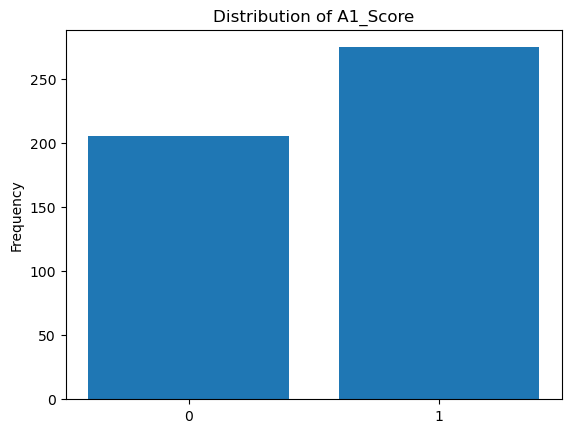

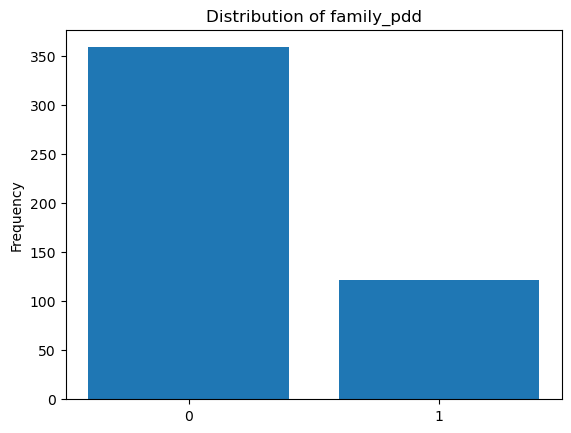

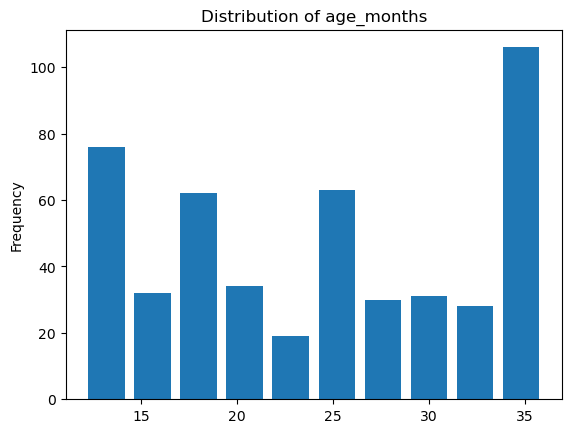

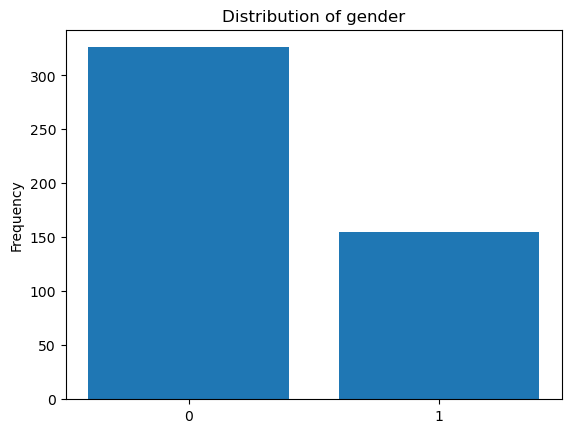

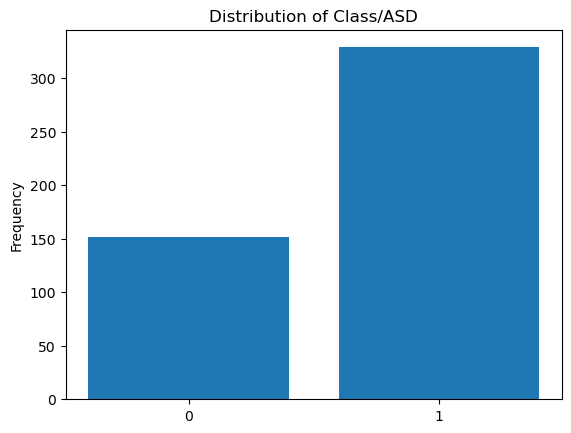

In [26]:
# Iterate over each column in the DataFrame
for column in df_cleaned.columns:
    # Check data type of the column
    if df_cleaned[column].dtype == 'object':  # Categorical data
        # Generate a bar plot for categorical data
        df_cleaned[column].value_counts().plot(kind='bar', title=f'Distribution of {column}')
        plt.xticks(rotation=45)  # Adjust rotation if necessary
    elif df_cleaned[column].dtype == 'bool' or (df_cleaned[column].dtype == 'int64' and df_cleaned[column].nunique() == 2):
        # Handle binary data specially
        df_cleaned[column].astype(int).plot(kind='hist', bins=[-0.5, 0.5, 1.5], title=f'Distribution of {column}', rwidth=0.8)
        plt.xticks([0, 1])  # Set x-ticks specifically for binary data
    elif df_cleaned[column].dtype in ['float64', 'int64']:
        # Handle float and integer data types for non-binary data
        df_cleaned[column].plot(kind='hist', bins=10, title=f'Distribution of {column}', rwidth=0.8)
    else:
        print(f"Skipping {column} as it is not suitable for histogram plotting.")

    plt.show()  # Ensure the plot is shown after each column

In [27]:
class_asd_counts = df_cleaned['Class/ASD'].value_counts()
print(class_asd_counts)

for column in df_cleaned.columns:
    print(f"{column}: {df_cleaned[column].unique()}")

print(df_cleaned.info())

df_cleaned_saudi = df_cleaned

Class/ASD
1    329
0    152
Name: count, dtype: int64
A10_Score: [False  True]
A9_Score: [False  True]
A8_Score: [ True False]
A7_Score: [ True False]
A6_Score: [ True False]
A5_Score: [False  True]
A4_Score: [False  True]
A3_Score: [False  True]
A2_Score: [False  True]
A1_Score: [False  True]
family_pdd: [False  True]
age_months: [32 30 36 17 18 24 26 28 14 15 12 16 20 34 13 22 25 33 29 27 35 19 21 23
 31]
gender: [False  True]
Class/ASD: [0 1]
<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   A10_Score   481 non-null    bool 
 1   A9_Score    481 non-null    bool 
 2   A8_Score    481 non-null    bool 
 3   A7_Score    481 non-null    bool 
 4   A6_Score    481 non-null    bool 
 5   A5_Score    481 non-null    bool 
 6   A4_Score    481 non-null    bool 
 7   A3_Score    481 non-null    bool 
 8   A2_Score    481 non-null    bool 
 9   A1_Score    481 

# Bangladesh Real-World Child Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [28]:
# Load file
path = "E:\\Users\\Prajj\\Documents\\7th Sem\\RM\\Datasets\\Real World Child Dataset\\child collected from real world.csv"
df = pd.read_csv(path)

print("Shape of DataFrame before dropping duplicates:", df.shape)

df.drop_duplicates(inplace=True)

print("Shape of DataFrame after dropping duplicates:", df.shape)

print(df.head())
print(df.describe())
print(df.info())

Shape of DataFrame before dropping duplicates: (252, 21)
Shape of DataFrame after dropping duplicates: (247, 21)
   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         0         0         0         1         0         0   
1         0         1         1         0         0         0         1   
2         1         1         1         1         1         1         1   
3         1         1         1         1         1         0         1   
4         0         1         0         0         1         0         1   

   A8_Score  A9_Score  A10_Score  ...  gender    ethnicity jundice austim  \
0         1         0          1  ...       f  City-people      no     no   
1         0         0          1  ...       f  City-people      no     no   
2         1         1          1  ...       f  City-people      no    yes   
3         1         0          1  ...       f  City-people      no    yes   
4         1         0          0  ...       m  City

C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\3290473774.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["jaundice"] = df["jaundice"].replace({"yes": 1, "no": 0}).astype(int)
C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\3290473774.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["family_pdd"] = df["family_pdd"].replace({"yes": 1, "no": 0}).astype(int)
C:\Users\Prajj\AppData\Local\Temp\ipykernel_13128\3290473774.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

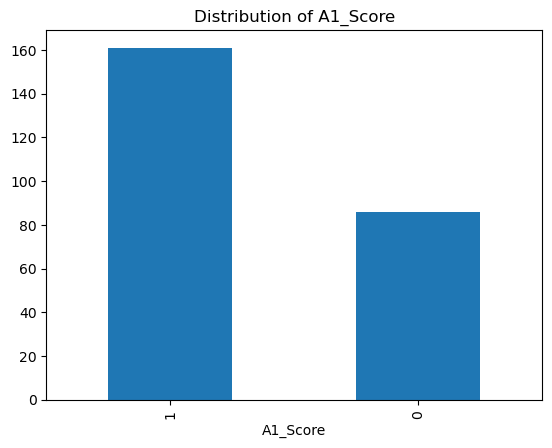

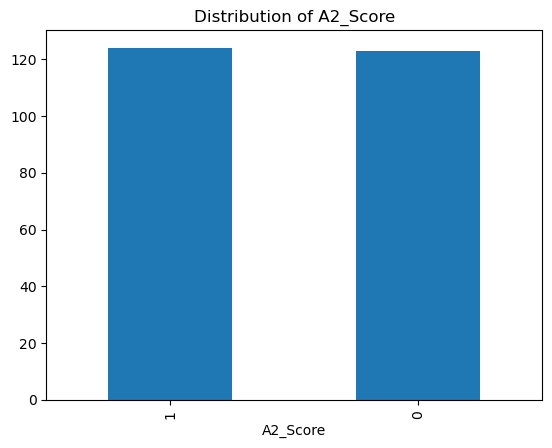

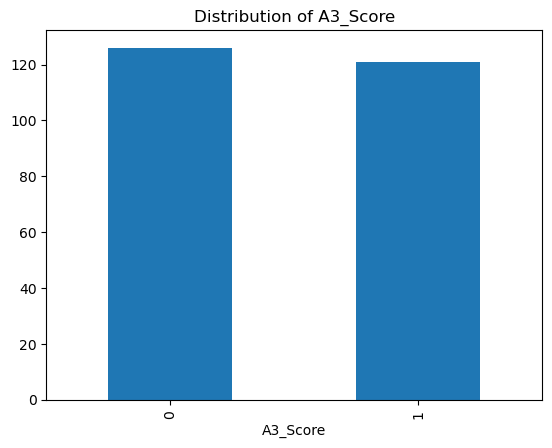

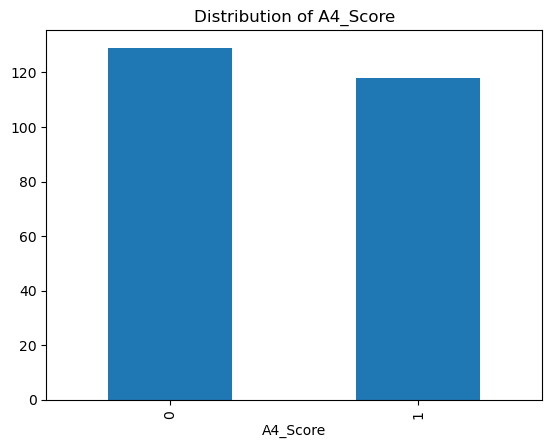

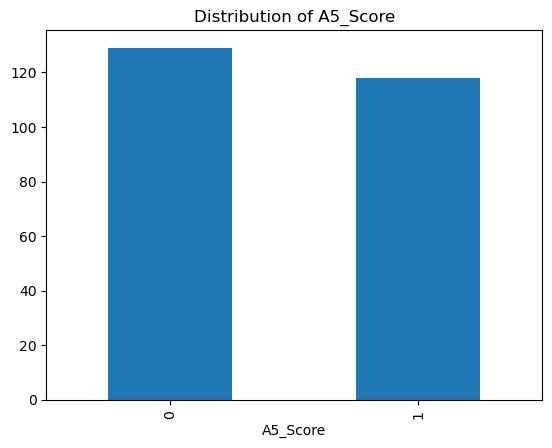

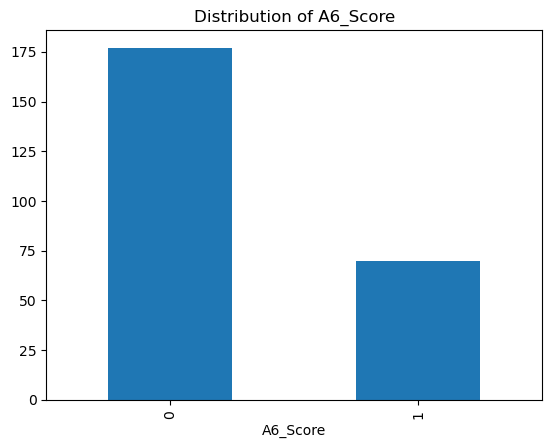

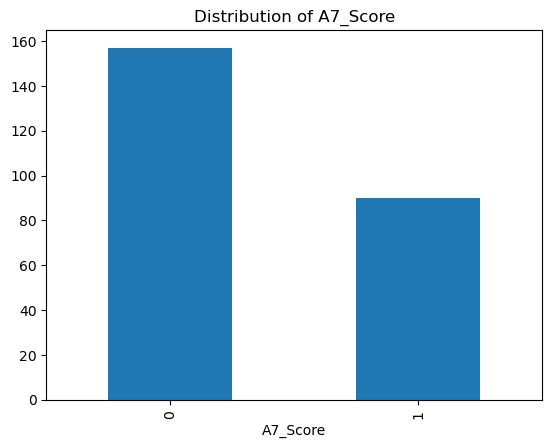

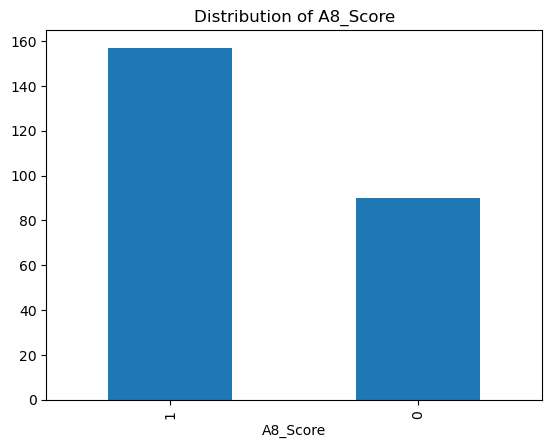

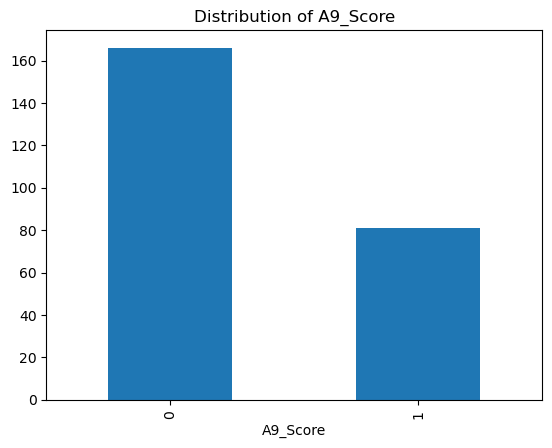

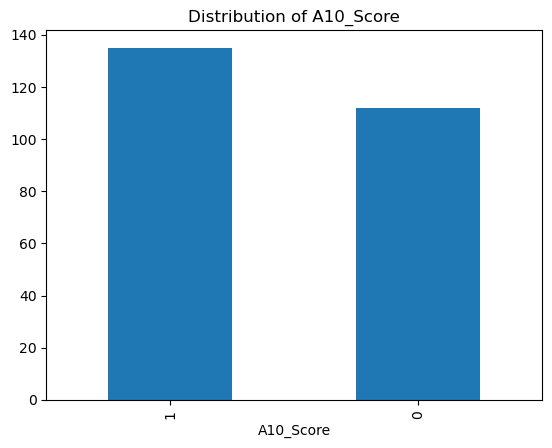

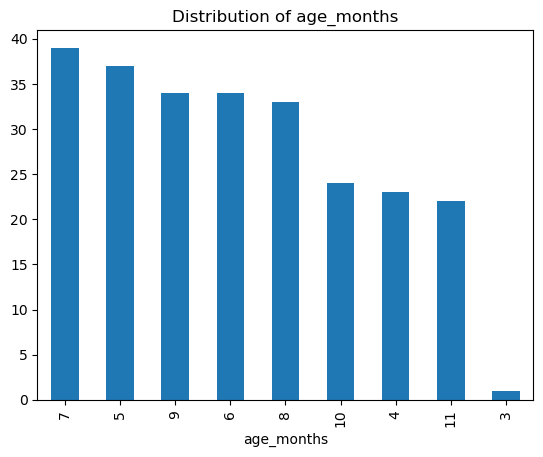

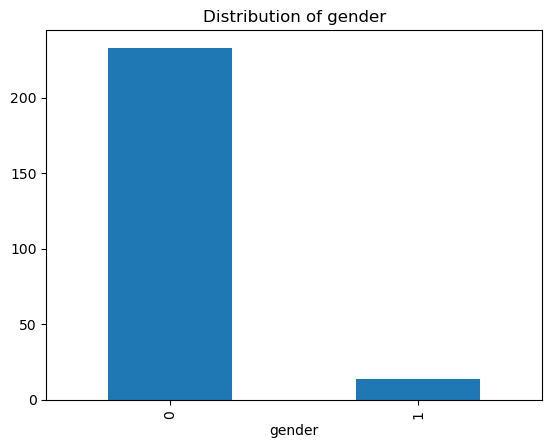

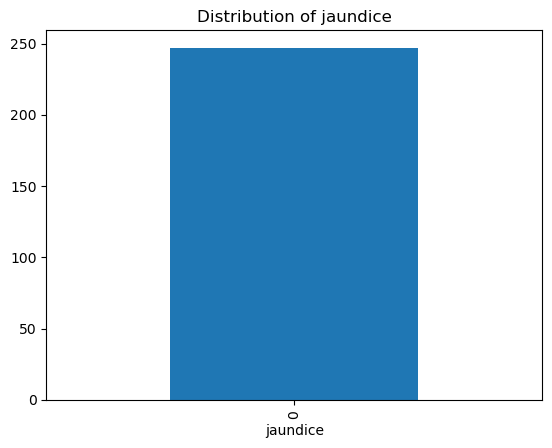

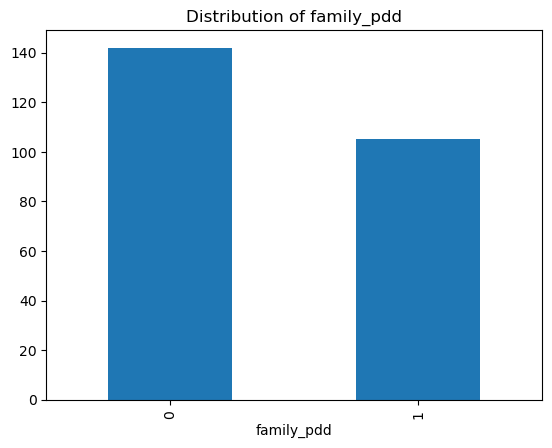

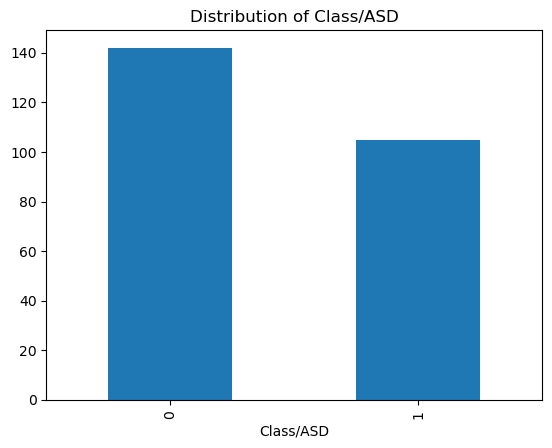

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 251
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   A1_Score    247 non-null    int64
 1   A2_Score    247 non-null    int64
 2   A3_Score    247 non-null    int64
 3   A4_Score    247 non-null    int64
 4   A5_Score    247 non-null    int64
 5   A6_Score    247 non-null    int64
 6   A7_Score    247 non-null    int64
 7   A8_Score    247 non-null    int64
 8   A9_Score    247 non-null    int64
 9   A10_Score   247 non-null    int64
 10  age_months  247 non-null    int64
 11  gender      247 non-null    int64
 12  jaundice    247 non-null    int64
 13  family_pdd  247 non-null    int64
 14  Class/ASD   247 non-null    int64
dtypes: int64(15)
memory usage: 30.9 KB
None
Class/ASD
0    142
1    105
Name: count, dtype: int64


In [29]:
# Rename only the necessary columns
df = df.rename(columns={
    "age": "age_months",
    "jundice": "jaundice",
    "austim": "family_pdd"
})

# Encode binary features as 0/1 (not True/False)
binary_cols = ["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score",
               "A6_Score","A7_Score","A8_Score","A9_Score","A10_Score"]
for col in binary_cols:
    df[col] = df[col].replace({1: 1, 0: 0}).astype(int)

if "jaundice" in df.columns:
    df["jaundice"] = df["jaundice"].replace({"yes": 1, "no": 0}).astype(int)

if "family_pdd" in df.columns:
    df["family_pdd"] = df["family_pdd"].replace({"yes": 1, "no": 0}).astype(int)

df["Class/ASD"] = df["Class/ASD"].replace({"YES": 1, "NO": 0}).astype(int)
df["gender"] = df["gender"].replace({"m": 1, "f": 0}).astype(int)

# Fill missing values in age
df["age_months"] = df["age_months"].fillna(df["age_months"].mean())

# Drop irrelevant columns
df_cleaned = df.drop(["result","relation","contry_of_res","used_app_before","age_desc","ethnicity"], axis=1, errors="ignore")

# Distribution plots
for column in df_cleaned.columns:
    if df_cleaned[column].nunique() <= 10:   # categorical/binary
        df_cleaned[column].value_counts().plot(kind="bar", title=f"Distribution of {column}")
        plt.show()
    else:   # continuous
        df_cleaned[column].plot(kind="hist", bins=10, title=f"Distribution of {column}", rwidth=0.8)
        plt.show()

print(df_cleaned.info())
print(df_cleaned["Class/ASD"].value_counts())

df_cleaned_bd = df_cleaned


# Preprocessing

In [30]:
# Separating features and labels
# nz dataset
X_nz = df_cleaned_nz.drop('Class/ASD', axis=1)  # Features
y_nz = df_cleaned_nz['Class/ASD']  # Labels

# Polish dataset
X_polish = df_cleaned_polish.drop('Class/ASD', axis=1)  # Features
y_polish = df_cleaned_polish['Class/ASD']  # Labels

# Saudi dataset
X_saudi = df_cleaned_saudi.drop('Class/ASD', axis=1)  # Features
y_saudi = df_cleaned_saudi['Class/ASD']  # Labels

# Bangladesh dataset
X_bd = df_cleaned_bd.drop('Class/ASD', axis=1)
y_bd = df_cleaned_bd['Class/ASD']

# Using only decision tree-based models, so scaling is unnecessary


# Baseline Model Testing / Feature Importance Exploration

## New Zealand Dataset

### Decision Tree

In [31]:
# Define the Decision Tree model
tree_model_nz_paramSearch = DecisionTreeClassifier()

# Specify the parameter grid to search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [15, 20, 25], # explored range 10 to 50
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Define the number of folds for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=tree_model_nz_paramSearch,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',  # Can be changed according to what metric you care about
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_nz, y_nz)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

# Optional: Extract the best model and use it for further analysis or validation
best_tree_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy'}
Best accuracy found:  0.9468607537801852


In [34]:
# Initialize the Decision Tree model
tree_model_nz = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=25, criterion='entropy')

# Define the number of folds for cross-validation
k = 5  # Number of folds
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define different scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(tree_model_nz, X_nz, y_nz, cv=cv, scoring=scoring, return_estimator=True)

# Collect predictions for confusion matrix
y_pred = cross_val_predict(tree_model_nz, X_nz, y_nz, cv=cv)

# Compute the confusion matrix
cm = confusion_matrix(y_nz, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

# Printing metrics
print(f"ROC-AUC across {k} folds: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_roc_auc', 'test_specificity']:
    print(f"{metric.capitalize()} across {k} folds: {np.mean(cv_results[metric]):.2f} ± {np.std(cv_results[metric]):.2f}")

ROC-AUC across 5 folds: 0.91 ± 0.02
Test_accuracy across 5 folds: 0.93 ± 0.02
Test_precision across 5 folds: 0.95 ± 0.01
Test_recall across 5 folds: 0.95 ± 0.01
Test_roc_auc across 5 folds: 0.91 ± 0.02
Test_specificity across 5 folds: 0.88 ± 0.03


### Random Forest

In [35]:
# Initialize the Random Forest model
forest_model_nz = RandomForestClassifier()

# Define the number of folds for cross-validation
k = 5  # Number of folds. k=5 or k=10 is often recommended
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Specify the parameter grid to search
param_dist = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],
    'max_depth': [40, 50, 60, 70], # explored none to 10 to ??
    'min_samples_split': [2, 3, 4], # explored 2 to 10
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # Options for the number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Define different scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'
}

# Set up the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=forest_model_nz,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',  # Can be changed according to what metric you care about
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_nz, y_nz)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 70, 'criterion': 'gini', 'bootstrap': True}
Best accuracy found:  0.9705845181674565


In [36]:
# Initialize the Random Forest model with specified hyperparameters
forest_model_nz = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=50,
    criterion='gini',
    random_state=42,
    bootstrap=False
)

# Define the number of folds for cross-validation
k = 5  # Number of folds
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'specificity': make_scorer(specificity_score),  # Include specificity in the scoring dictionary
    'roc_auc': 'roc_auc'
}

# Perform cross-validation and retain the models for feature importance
cv_results = cross_validate(forest_model_nz, X_nz, y_nz, cv=cv, scoring=scoring, return_estimator=True)

# Collect predictions for confusion matrix
y_pred = cross_val_predict(forest_model_nz, X_nz, y_nz, cv=cv)

# Compute the confusion matrix
cm = confusion_matrix(y_nz, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Printing metrics
print(f"ROC-AUC across {k} folds: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")
for metric in scoring.keys():
    print(f"{metric.capitalize()} across {k} folds: {np.mean(cv_results['test_' + metric]):.2f} ± {np.std(cv_results['test_' + metric]):.2f}")

ROC-AUC across 5 folds: 0.99 ± 0.00
Accuracy across 5 folds: 0.97 ± 0.02
Precision across 5 folds: 0.97 ± 0.01
Recall across 5 folds: 0.98 ± 0.01
Specificity across 5 folds: 0.94 ± 0.03
Roc_auc across 5 folds: 0.99 ± 0.00


### XGBoost

In [37]:
# Initialize the XGBoost model
xgb_model_nz = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the number of folds for cross-validation
k = 5  # Number of folds. k=5 or k=10 is often recommended
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Specify the parameter grid to search
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],  # Typical values for depth in XGBoost
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Learning rate or eta
    'subsample': [0.5, 0.75, 1],  # Subsample ratio of the training instances
    'colsample_bytree': [0.5, 0.7, 1],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition
    'reg_lambda': [1, 2, 3],  # L2 regularization term on weights
    'reg_alpha': [0, 0.1, 0.2]  # L1 regularization term on weights
}

# Define different scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'
}

# Set up the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model_nz,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',  # Can be changed according to what metric you care about
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_nz, y_nz)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:27] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'subsample': 0.5, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best accuracy found:  1.0


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:29] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Miniforge3\envs\ml\Lib\site-packages\sklearn\metrics\_scorer.py", line 152, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "d:\Miniforge3\envs\ml\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "d:\Miniforge3\envs\ml\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "d:\Miniforge3\envs\ml\Lib\sit

ROC-AUC across 5 folds: nan ± nan
Test_accuracy across 5 folds: 1.00 ± 0.00
Test_precision across 5 folds: 1.00 ± 0.00
Test_recall across 5 folds: 1.00 ± 0.00
Test_specificity across 5 folds: 1.00 ± 0.00
Test_roc_auc across 5 folds: nan ± nan
Feature Importances:
A9_Score: 0.17284493148326874
A5_Score: 0.13428132236003876
A1_Score: 0.12487664371728897
A4_Score: 0.12334955632686614
A7_Score: 0.10031566470861435
A6_Score: 0.08072130680084229
A2_Score: 0.0670560672879219
A8_Score: 0.06353428438305855
A3_Score: 0.034488387033343317
A10_Score: 0.033765553310513494
family_pdd: 0.024989230558276176
gender: 0.021890733391046524
age_months: 0.017886313796043395


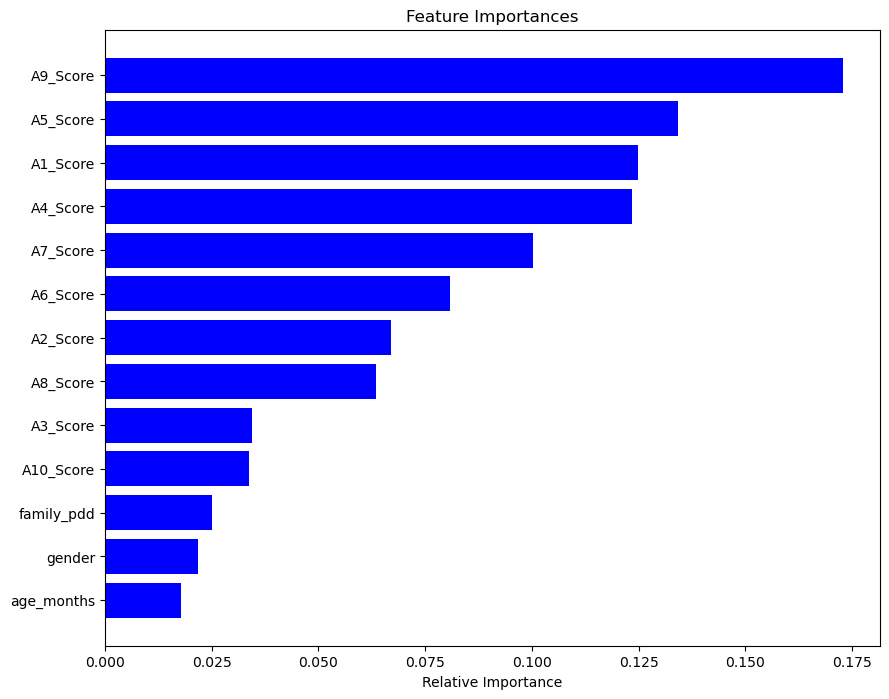

<Figure size 640x480 with 0 Axes>

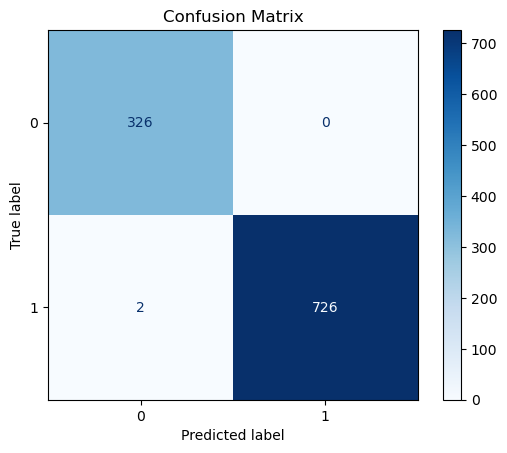

In [38]:
# Initialize the XGBoost model with relevant hyperparameters
xgb_model_nz = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.5,
    gamma=0.3,
    reg_lambda=3,
    reg_alpha=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define the number of folds for cross-validation
k = 5  # Number of folds
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'
}

# Perform cross-validation and return estimators
cv_results = cross_validate(xgb_model_nz, X_nz, y_nz, cv=cv, scoring=scoring, return_estimator=True)

# Collect predictions for the confusion matrix
y_pred = cross_val_predict(xgb_model_nz, X_nz, y_nz, cv=cv)

# Compute the confusion matrix
cm = confusion_matrix(y_nz, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Print metrics
print(f"ROC-AUC across {k} folds: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_specificity', 'test_roc_auc']:
    print(f"{metric.capitalize()} across {k} folds: {np.mean(cv_results[metric]):.2f} ± {np.std(cv_results[metric]):.2f}")

# Collect all feature importances
feature_importances = np.zeros(X_nz.shape[1])
for estimator in cv_results['estimator']:
    feature_importances += estimator.feature_importances_

# Average feature importances
feature_importances /= k

features = X_nz.columns

# Print feature importances in order
print("Feature Importances:")
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort indices in descending order of importance
for i in sorted_indices:
    print(f"{features[i]}: {feature_importances[i]}")

# Plot feature importances
indices = np.argsort(feature_importances)
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Plot the confusion matrix
plt.figure()
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### Recursive Feature Elimination

d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:40] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:40] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Features retained (13): ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age_months', 'gender', 'family_pdd']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Sensitivity with 13 features: 1.00 ± 0.00
Specificity with 13 features: 1.00 ± 0.00
Balanced_accuracy with 13 features: 1.00 ± 0.00
Features retained (12): ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age_months', 'gender']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 12 features: 1.00 ± 0.00
Specificity with 12 features: 1.00 ± 0.00
Balanced_accuracy with 12 features: 1.00 ± 0.00


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:42] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:42] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:42] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:42] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Features retained (11): ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age_months']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:42] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:43] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:43] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:43] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 11 features: 1.00 ± 0.00
Specificity with 11 features: 1.00 ± 0.01
Balanced_accuracy with 11 features: 1.00 ± 0.00


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:43] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:44] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:44] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:44] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Features retained (10): ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:44] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:45] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:45] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:45] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 10 features: 1.00 ± 0.00
Specificity with 10 features: 1.00 ± 0.00
Balanced_accuracy with 10 features: 1.00 ± 0.00


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:46] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:46] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:46] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:47] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Features retained (9): ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:47] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:47] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:48] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:48] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 9 features: 0.98 ± 0.02
Specificity with 9 features: 0.92 ± 0.02
Balanced_accuracy with 9 features: 0.95 ± 0.01


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:48] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:49] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:49] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:49] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (8): ['A1_Score', 'A2_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:49] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:50] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:50] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:50] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Sensitivity with 8 features: 0.98 ± 0.01
Specificity with 8 features: 0.91 ± 0.02
Balanced_accuracy with 8 features: 0.94 ± 0.01


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:51] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:51] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:51] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:51] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (7): ['A1_Score', 'A2_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A9_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:52] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:52] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:53] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:53] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Sensitivity with 7 features: 0.95 ± 0.01
Specificity with 7 features: 0.90 ± 0.02
Balanced_accuracy with 7 features: 0.93 ± 0.01


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:53] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:53] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:54] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:54] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (6): ['A1_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A9_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:54] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:55] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:55] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:55] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 6 features: 0.94 ± 0.01
Specificity with 6 features: 0.82 ± 0.06
Balanced_accuracy with 6 features: 0.88 ± 0.03


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:56] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:56] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:56] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:56] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (5): ['A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A9_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:57] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:57] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:58] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:58] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 5 features: 0.94 ± 0.01
Specificity with 5 features: 0.84 ± 0.03
Balanced_accuracy with 5 features: 0.89 ± 0.01


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:58] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:59] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:59] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:59] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (4): ['A5_Score', 'A6_Score', 'A7_Score', 'A9_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:00] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:00] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:01] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:01] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 4 features: 0.91 ± 0.01
Specificity with 4 features: 0.88 ± 0.05
Balanced_accuracy with 4 features: 0.89 ± 0.03


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:01] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:01] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:02] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:02] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (3): ['A6_Score', 'A7_Score', 'A9_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:03] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:03] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:03] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:04] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 3 features: 0.87 ± 0.03
Specificity with 3 features: 0.82 ± 0.12
Balanced_accuracy with 3 features: 0.84 ± 0.05


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:04] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:04] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:04] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:05] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (2): ['A6_Score', 'A9_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:06] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:06] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:07] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:07] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 2 features: 0.89 ± 0.02
Specificity with 2 features: 0.79 ± 0.10
Balanced_accuracy with 2 features: 0.84 ± 0.05


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:07] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:08] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:08] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:08] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (1): ['A6_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:10] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:10] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:10] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:10] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 1 features: 0.77 ± 0.03
Specificity with 1 features: 0.84 ± 0.07
Balanced_accuracy with 1 features: 0.80 ± 0.05


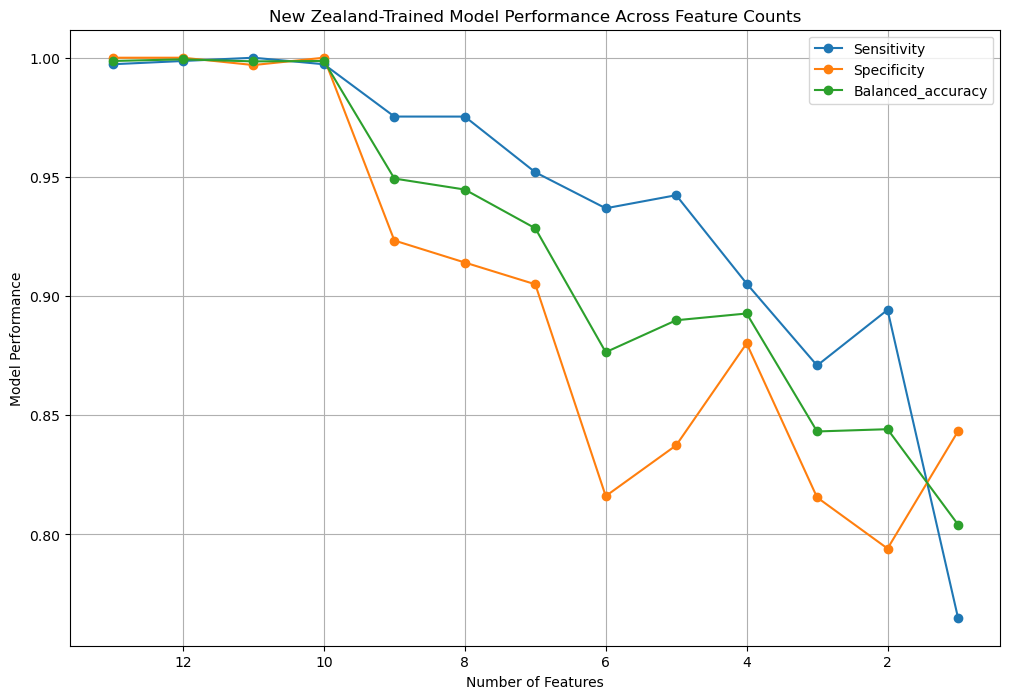

In [39]:
# Initialize the XGBoost model with relevant hyperparameters
xgb_model_nz = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.5,
    gamma=0.3,
    reg_lambda=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define the number of folds for cross-validation
k = 5  # Number of folds
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define different scoring metrics
scoring = {
    'sensitivity': 'recall',
    'specificity': make_scorer(specificity_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Initialize lists to store metrics for each number of features
metrics_history = {
    'sensitivity': [],
    'specificity': [],
    'balanced_accuracy': []
}

num_features = X_nz.shape[1]
features_list = X_nz.columns.tolist()  # Store initial full feature list

# Perform RFE with cross-validation and track metrics
for i in range(num_features, 0, -1):
    rfe = RFE(estimator=xgb_model_nz, n_features_to_select=i, step=1)
    rfe.fit(X_nz, y_nz)

    # Current set of selected features
    current_features = list(X_nz.columns[rfe.support_])
    print(f"Features retained ({i}): {current_features}")

    # Evaluate metrics for the selected features
    cv_results = cross_validate(rfe.estimator_, rfe.transform(X_nz), y_nz, cv=cv, scoring=scoring)

    # Store results for plotting
    for metric in scoring:
        mean_score = cv_results[f'test_{metric}'].mean()
        std_score = cv_results[f'test_{metric}'].std()
        metrics_history[metric].append(mean_score)
        print(f"{metric.capitalize()} with {i} features: {mean_score:.2f} ± {std_score:.2f}")

# Plotting the metrics over the number of features
plt.figure(figsize=(12, 8))
feature_counts = list(range(num_features, 0, -1))
for metric, values in metrics_history.items():
    plt.plot(feature_counts, values, marker='o', linestyle='-', label=metric.capitalize())

plt.title('New Zealand-Trained Model Performance Across Feature Counts')
plt.xlabel('Number of Features')
plt.ylabel('Model Performance')
plt.legend()
plt.gca().invert_xaxis()  # Optional: Invert x-axis to show decreasing number of features
plt.grid(True)
plt.show()

## Saudi Dataset

### Decision Tree

In [40]:
# Define the Decision Tree model
tree_model_saudi_paramSearch = DecisionTreeClassifier()

# Specify the parameter grid to search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50], # explored range 10 to 50
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Define the number of folds for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=tree_model_saudi_paramSearch,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',  # Can be changed according to what metric you care about
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_saudi, y_saudi)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

# Optional: Extract the best model and use it for further analysis or validation
best_tree_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'entropy'}
Best accuracy found:  0.9501073883161512


In [41]:
# Initialize the Decision Tree model
tree_model_saudi = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=50, criterion='entropy')

# Define the number of folds for cross-validation
k = 5  # Number of folds
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define different scoring metrics, including specificity
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(tree_model_saudi, X_saudi, y_saudi, cv=cv, scoring=scoring, return_estimator=True)

# Collect predictions for the confusion matrix
y_pred = cross_val_predict(tree_model_saudi, X_saudi, y_saudi, cv=cv)

# Compute the confusion matrix
cm = confusion_matrix(y_saudi, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Print metrics
print(f"ROC-AUC across {k} folds: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")
for metric in ['accuracy', 'precision', 'recall', 'specificity', 'roc_auc']:  # Remove the redundant 'test_' from the list items
    mean_value = np.mean(cv_results[f'test_{metric}'])
    std_value = np.std(cv_results[f'test_{metric}'])
    print(f"{metric.capitalize()} across {k} folds: {mean_value:.2f} ± {std_value:.2f}")

ROC-AUC across 5 folds: 0.94 ± 0.02
Accuracy across 5 folds: 0.95 ± 0.00
Precision across 5 folds: 0.97 ± 0.02
Recall across 5 folds: 0.96 ± 0.02
Specificity across 5 folds: 0.93 ± 0.05
Roc_auc across 5 folds: 0.94 ± 0.02


### Random Forest

In [42]:
# Initialize the Random Forest model
forest_model_saudi = RandomForestClassifier()

# Define the number of folds for cross-validation
k = 5  # Number of folds. k=5 or k=10 is often recommended
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Specify the parameter grid to search
param_dist = {
    'n_estimators': [50, 75, 100, 125, 150, 175],  # Tested 50 to 400
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15], # Tested none to 5 to 50
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3], # Tested 1 to 4
    'max_features': ['sqrt', 'log2'],  # Options for the number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Define different scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': 'roc_auc'
}

# Set up the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=forest_model_saudi,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',  # Can be changed according to what metric you care about
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_saudi, y_saudi)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
Best accuracy found:  0.9771262886597938


In [43]:
# Initialize the Random Forest model with specified hyperparameters
forest_model_saudi = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=10,
    criterion='entropy',
    random_state=42,
    bootstrap=False
)

# Define the number of folds for cross-validation
k = 5  # Number of folds
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define scoring metrics, including specificity
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'
}

# Perform cross-validation and retain the models for feature importance
cv_results = cross_validate(forest_model_saudi, X_saudi, y_saudi, cv=cv, scoring=scoring, return_estimator=True)

# Collect predictions for confusion matrix
y_pred = cross_val_predict(forest_model_saudi, X_saudi, y_saudi, cv=cv)

# Compute the confusion matrix
cm = confusion_matrix(y_saudi, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Print metrics
print(f"ROC-AUC across {k} folds: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")
for metric in scoring.keys():
    if metric != 'roc_auc':  # roc_auc is already formatted in the previous print statement
        mean_score = np.mean(cv_results[f'test_{metric}'])
        std_score = np.std(cv_results[f'test_{metric}'])
        print(f"{metric.capitalize()} across {k} folds: {mean_score:.2f} ± {std_score:.2f}")

ROC-AUC across 5 folds: 1.00 ± 0.00
Accuracy across 5 folds: 0.97 ± 0.02
Precision across 5 folds: 0.97 ± 0.03
Recall across 5 folds: 0.99 ± 0.01
Specificity across 5 folds: 0.93 ± 0.06


### XGBoost

In [44]:
# Initialize the XGBoost model
xgb_model_saudi = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the number of folds for cross-validation
k = 5  # Number of folds. k=5 or k=10 is often recommended
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Specify the parameter grid to search
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],  # Typical values for depth in XGBoost
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Learning rate or eta
    'subsample': [0.5, 0.75, 1],  # Subsample ratio of the training instances
    'colsample_bytree': [0.5, 0.7, 1],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition
    'reg_lambda': [1, 2, 3],  # L2 regularization term on weights
    'reg_alpha': [0, 0.1, 0.2]  # L1 regularization term on weights
}

# Define different scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': 'roc_auc'
}

# Set up the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model_saudi,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',  # Can be changed according to what metric you care about
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_saudi, y_saudi)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:16] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'subsample': 0.5, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}
Best accuracy found:  0.9979166666666668


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:26] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Miniforge3\envs\ml\Lib\site-packages\sklearn\metrics\_scorer.py", line 152, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "d:\Miniforge3\envs\ml\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "d:\Miniforge3\envs\ml\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "d:\Miniforge3\envs\ml\Lib\sit

ROC-AUC across 5 folds: nan ± nan
Accuracy across 5 folds: 1.00 ± 0.00
Precision across 5 folds: 1.00 ± 0.00
Recall across 5 folds: 1.00 ± 0.01
Specificity across 5 folds: 1.00 ± 0.00
Feature Importances:
A5_Score: 0.19895327985286712
A2_Score: 0.19219817221164703
A9_Score: 0.16961656808853148
A3_Score: 0.06632346734404564
A7_Score: 0.05677275955677032
A8_Score: 0.05454940795898437
A6_Score: 0.05422456786036491
age_months: 0.0521140344440937
A10_Score: 0.04733308926224709
A4_Score: 0.046726053953170775
A1_Score: 0.02982356585562229
family_pdd: 0.017781211994588375
gender: 0.013583874888718128


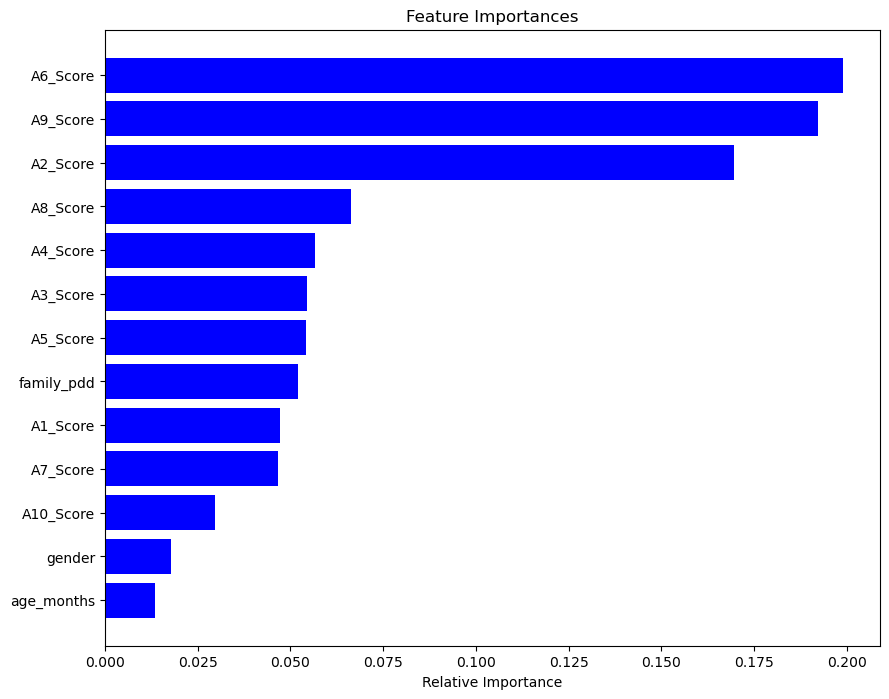

<Figure size 640x480 with 0 Axes>

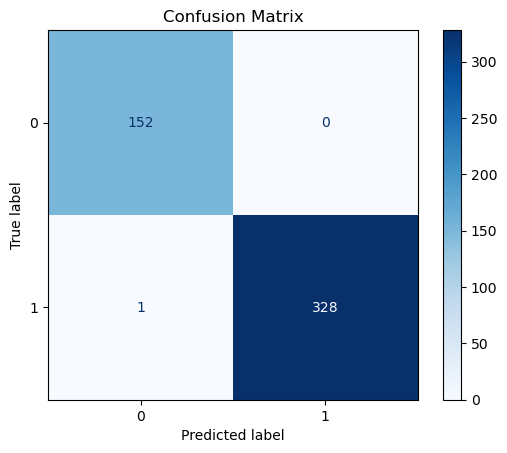

In [45]:
# Initialize the XGBoost model with relevant hyperparameters
xgb_model_saudi = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.7,
    gamma=0,
    reg_lambda=3,
    reg_alpha=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define the number of folds for cross-validation
k = 5  # Number of folds
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'specificity': make_scorer(specificity_score),
    'roc_auc': 'roc_auc'
}

# Perform cross-validation and return estimators
cv_results = cross_validate(xgb_model_saudi, X_saudi, y_saudi, cv=cv, scoring=scoring, return_estimator=True)

# Collect predictions for the confusion matrix
y_pred = cross_val_predict(xgb_model_saudi, X_saudi, y_saudi, cv=cv)

# Compute the confusion matrix
cm = confusion_matrix(y_saudi, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Print metrics
print(f"ROC-AUC across {k} folds: {np.mean(cv_results['test_roc_auc']):.2f} ± {np.std(cv_results['test_roc_auc']):.2f}")
for metric in scoring.keys():
    if metric != 'roc_auc':  # 'roc_auc' does not require 'test_' prefix in print
        print(f"{metric.capitalize()} across {k} folds: {np.mean(cv_results[f'test_{metric}']):.2f} ± {np.std(cv_results[f'test_{metric}']):.2f}")

# Collect all feature importances
feature_importances = np.zeros(X_saudi.shape[1])
for estimator in cv_results['estimator']:
    feature_importances += estimator.feature_importances_

# Average feature importances
feature_importances /= k

# Print feature importances in order
print("Feature Importances:")
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort indices in descending order of importance
for i in sorted_indices:
    print(f"{features[i]}: {feature_importances[i]}")

# Plot feature importances
features = X_saudi.columns
indices = np.argsort(feature_importances)
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Plot the confusion matrix
plt.figure()
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Recursive Feature Elimination

d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:35] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:35] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Features retained (13): ['A10_Score', 'A9_Score', 'A8_Score', 'A7_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A2_Score', 'A1_Score', 'family_pdd', 'age_months', 'gender']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:35] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:35] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:36] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:36] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Sensitivity with 13 features: 1.00 ± 0.01
Specificity with 13 features: 1.00 ± 0.00
Balanced_accuracy with 13 features: 1.00 ± 0.00


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:36] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:36] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Features retained (12): ['A10_Score', 'A9_Score', 'A8_Score', 'A7_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A2_Score', 'A1_Score', 'family_pdd', 'age_months']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:36] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:36] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:36] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:37] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 12 features: 0.99 ± 0.01
Specificity with 12 features: 1.00 ± 0.00
Balanced_accuracy with 12 features: 1.00 ± 0.00


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:37] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:37] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:38] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:38] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Features retained (11): ['A10_Score', 'A9_Score', 'A8_Score', 'A7_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A2_Score', 'A1_Score', 'family_pdd']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:38] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:38] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:39] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:39] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 11 features: 0.99 ± 0.01
Specificity with 11 features: 1.00 ± 0.00
Balanced_accuracy with 11 features: 1.00 ± 0.00


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:39] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:40] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:40] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Features retained (10): ['A10_Score', 'A9_Score', 'A8_Score', 'A7_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A2_Score', 'A1_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:40] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:40] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:40] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 10 features: 0.99 ± 0.01
Specificity with 10 features: 1.00 ± 0.00
Balanced_accuracy with 10 features: 1.00 ± 0.00


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:41] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:42] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:42] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (9): ['A9_Score', 'A8_Score', 'A7_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A2_Score', 'A1_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:42] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:43] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:43] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:43] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 9 features: 0.98 ± 0.01
Specificity with 9 features: 0.97 ± 0.01
Balanced_accuracy with 9 features: 0.98 ± 0.01


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:43] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:44] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:44] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:44] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (8): ['A9_Score', 'A8_Score', 'A7_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A2_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:44] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:45] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:45] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:45] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 8 features: 0.97 ± 0.01
Specificity with 8 features: 0.95 ± 0.02
Balanced_accuracy with 8 features: 0.96 ± 0.01


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:46] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:46] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:46] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:46] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (7): ['A9_Score', 'A8_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A2_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:47] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:47] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:48] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:48] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Sensitivity with 7 features: 0.98 ± 0.02
Specificity with 7 features: 0.93 ± 0.04
Balanced_accuracy with 7 features: 0.95 ± 0.02


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:48] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:48] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:48] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:49] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (6): ['A9_Score', 'A8_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A2_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:50] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:50] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:50] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:50] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 6 features: 0.96 ± 0.02
Specificity with 6 features: 0.91 ± 0.04
Balanced_accuracy with 6 features: 0.94 ± 0.02


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:51] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:51] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:52] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:52] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (5): ['A9_Score', 'A8_Score', 'A6_Score', 'A4_Score', 'A2_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:54] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:54] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:54] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:54] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Sensitivity with 5 features: 0.95 ± 0.01
Specificity with 5 features: 0.93 ± 0.05
Balanced_accuracy with 5 features: 0.94 ± 0.02


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:55] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:55] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:55] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:55] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (4): ['A9_Score', 'A8_Score', 'A6_Score', 'A2_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:57] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:57] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:58] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:58] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Sensitivity with 4 features: 0.95 ± 0.04
Specificity with 4 features: 0.89 ± 0.05
Balanced_accuracy with 4 features: 0.92 ± 0.03


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:58] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:58] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:58] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:58] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (3): ['A9_Score', 'A6_Score', 'A2_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:00] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:00] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:01] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:01] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Sensitivity with 3 features: 0.98 ± 0.01
Specificity with 3 features: 0.81 ± 0.05
Balanced_accuracy with 3 features: 0.90 ± 0.03


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:01] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:01] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:01] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:01] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (2): ['A6_Score', 'A2_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:03] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:03] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:03] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:03] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 2 features: 0.92 ± 0.02
Specificity with 2 features: 0.89 ± 0.04
Balanced_accuracy with 2 features: 0.90 ± 0.02


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:04] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:04] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:05] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:05] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Features retained (1): ['A6_Score']


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:07] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:07] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:07] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:07] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Miniforge3\envs\ml\Lib\site-packa

Sensitivity with 1 features: 0.78 ± 0.05
Specificity with 1 features: 0.93 ± 0.04
Balanced_accuracy with 1 features: 0.86 ± 0.03


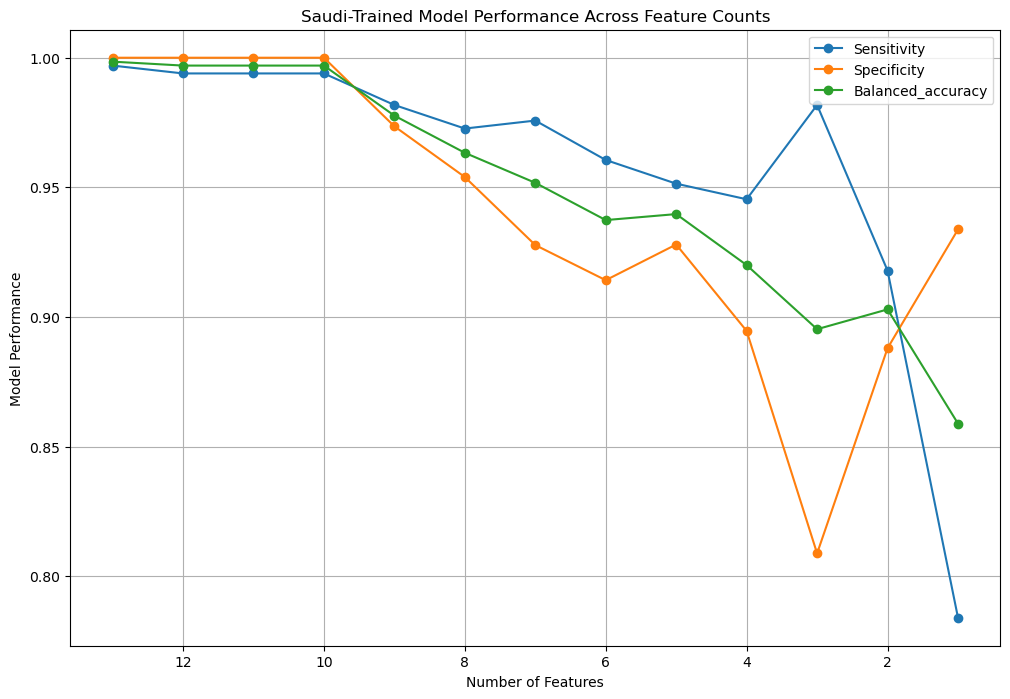

In [46]:
# Initialize the XGBoost model with relevant hyperparameters
xgb_model_saudi = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.7,
    gamma=0,
    reg_lambda=3,
    reg_alpha=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define the number of folds for cross-validation
k = 5  # Number of folds
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define different scoring metrics
scoring = {
    'sensitivity': 'recall',
    'specificity': make_scorer(specificity_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Initialize lists to store metrics for each number of features
metrics_history = {
    'sensitivity': [],
    'specificity': [],
    'balanced_accuracy': []
}

num_features = X_saudi.shape[1]
features_list = X_saudi.columns.tolist()  # Store initial full feature list

# Perform RFE with cross-validation and track metrics
for i in range(num_features, 0, -1):
    rfe = RFE(estimator=xgb_model_saudi, n_features_to_select=i, step=1)
    rfe.fit(X_saudi, y_saudi)

    # Current set of selected features
    current_features = list(X_saudi.columns[rfe.support_])
    print(f"Features retained ({i}): {current_features}")

    # Evaluate metrics for the selected features
    cv_results = cross_validate(rfe.estimator_, rfe.transform(X_saudi), y_saudi, cv=cv, scoring=scoring)

    # Store results for plotting
    for metric in scoring:
        mean_score = cv_results[f'test_{metric}'].mean()
        std_score = cv_results[f'test_{metric}'].std()
        metrics_history[metric].append(mean_score)
        print(f"{metric.capitalize()} with {i} features: {mean_score:.2f} ± {std_score:.2f}")

# Plotting the metrics over the number of features
plt.figure(figsize=(12, 8))
feature_counts = list(range(num_features, 0, -1))
for metric, values in metrics_history.items():
    plt.plot(feature_counts, values, marker='o', linestyle='-', label=metric.capitalize())

plt.title('Saudi-Trained Model Performance Across Feature Counts')
plt.xlabel('Number of Features')
plt.ylabel('Model Performance')
plt.legend()
plt.gca().invert_xaxis()  # Optional: Invert x-axis to show decreasing number of features
plt.grid(True)
plt.show()

# Maximize Recall Full Featured and Best-Performing Model

## New Zealand Dataset - XGB Model

### Full Feature Model - train on New Zealand and validate on Saudi

#### 0.5 Threshold

Columns are not the same. Reordering...
Accuracy: 1.00 ± 0.00
Precision: 1.00 ± 0.00
Recall: 1.00 ± 0.00
Specificity: 1.00 ± 0.00
ROC-AUC: 1.00 ± 0.00
Confusion Matrix:
[[152   0]
 [  0 329]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:10] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


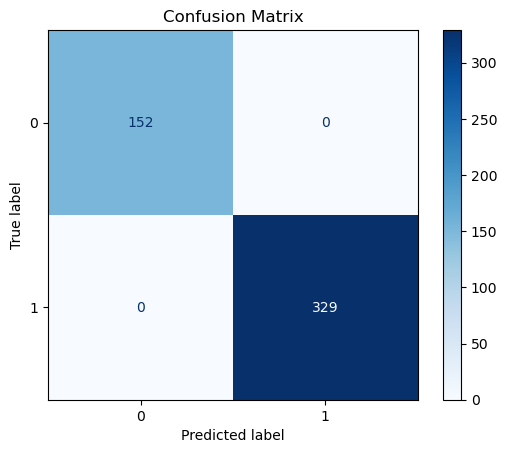

In [47]:
threshold = 0.5

X_saudi = check_and_reorder_columns(X_nz, X_saudi)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_nz = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.5,
    gamma=0.3,
    reg_lambda=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the nz dataset
xgb_model_nz.fit(X_nz, y_nz)

# Predict the outcomes on the Saudi dataset using predict_proba
y_proba_saudi = xgb_model_nz.predict_proba(X_saudi)[:, 1]
y_pred_saudi = (y_proba_saudi >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_saudi, y_pred_saudi)
precision = precision_score(y_saudi, y_pred_saudi)
recall = recall_score(y_saudi, y_pred_saudi)
specificity = specificity_score(y_saudi, y_pred_saudi)
roc_auc = roc_auc_score(y_saudi, y_pred_saudi)

# Compute the standard deviations
conf_matrix = confusion_matrix(y_saudi, y_pred_saudi)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### 0.3 Threshold

Columns are the same.
Accuracy: 1.00 ± 0.00
Precision: 0.99 ± 0.00
Recall: 1.00 ± 0.00
Specificity: 0.99 ± 0.01
ROC-AUC: 1.00 ± 0.00
Confusion Matrix:
[[150   2]
 [  0 329]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:16] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


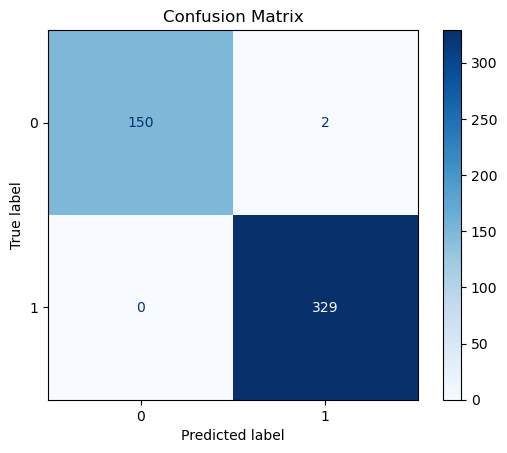

In [48]:
threshold = 0.3

X_saudi = check_and_reorder_columns(X_nz, X_saudi)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_nz = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.5,
    gamma=0.3,
    reg_lambda=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the nz dataset
xgb_model_nz.fit(X_nz, y_nz)

# Predict the outcomes on the Saudi dataset using predict_proba
y_proba_saudi = xgb_model_nz.predict_proba(X_saudi)[:, 1]
y_pred_saudi = (y_proba_saudi >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_saudi, y_pred_saudi)
precision = precision_score(y_saudi, y_pred_saudi)
recall = recall_score(y_saudi, y_pred_saudi)
specificity = specificity_score(y_saudi, y_pred_saudi)
roc_auc = roc_auc_score(y_saudi, y_proba_saudi)

# Compute the standard deviations
conf_matrix = confusion_matrix(y_saudi, y_pred_saudi)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Best-performing model - train on New Zealand and validate on Saudi

#### 0.5 Threshold

Columns are the same.
Accuracy: 0.91 ± 0.01
Precision: 0.96 ± 0.01
Recall: 0.91 ± 0.01
Specificity: 0.91 ± 0.01
ROC-AUC: 0.96 ± 0.03
Confusion Matrix:
[[138  14]
 [ 30 299]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:19] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


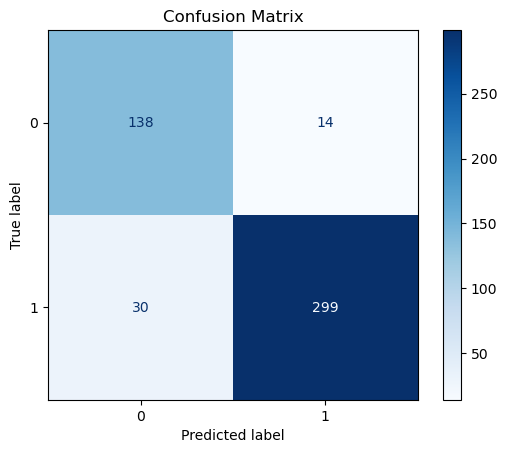

In [49]:
threshold = 0.5

X_nz_4features = X_nz.drop(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A8_Score', 'A10_Score', 'age_months', 'gender', 'family_pdd'], axis=1)
X_saudi_4features = X_saudi.drop(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A8_Score', 'A10_Score', 'age_months', 'gender', 'family_pdd'], axis=1)

X_saudi_4features = check_and_reorder_columns(X_nz_4features, X_saudi_4features)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_nz = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.5,
    gamma=0.3,
    reg_lambda=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the nz dataset
xgb_model_nz.fit(X_nz_4features, y_nz)

# Predict the outcomes on the Saudi dataset using predict_proba
y_proba_saudi = xgb_model_nz.predict_proba(X_saudi_4features)[:, 1]
y_pred_saudi = (y_proba_saudi >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_saudi, y_pred_saudi)
precision = precision_score(y_saudi, y_pred_saudi)
recall = recall_score(y_saudi, y_pred_saudi)
specificity = specificity_score(y_saudi, y_pred_saudi)
roc_auc = roc_auc_score(y_saudi, y_proba_saudi)  # Ensure y_saudi and predictions are appropriate for ROC calculation

# Compute the standard deviations
conf_matrix = confusion_matrix(y_saudi, y_pred_saudi)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### O.3 Threshold

Columns are the same.
Accuracy: 0.88 ± 0.01
Precision: 0.88 ± 0.02
Recall: 0.96 ± 0.01
Specificity: 0.71 ± 0.02
ROC-AUC: 0.96 ± 0.03
Confusion Matrix:
[[108  44]
 [ 12 317]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:24] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


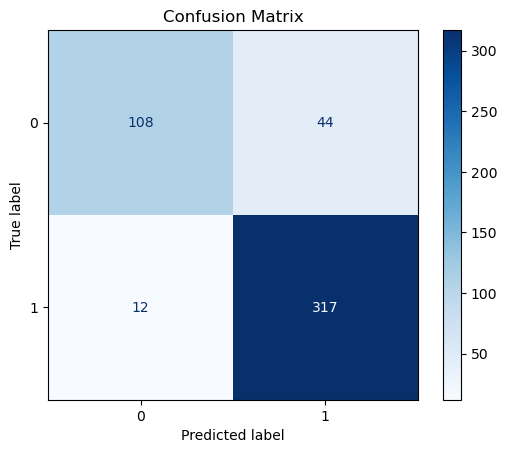

In [50]:
threshold = 0.3

X_nz_4features = X_nz.drop(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A8_Score', 'A10_Score', 'age_months', 'gender', 'family_pdd'], axis=1)
X_saudi_4features = X_saudi.drop(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A8_Score', 'A10_Score', 'age_months', 'gender', 'family_pdd'], axis=1)

X_saudi_4features = check_and_reorder_columns(X_nz_4features, X_saudi_4features)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_nz = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.5,
    gamma=0.3,
    reg_lambda=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the nz dataset
xgb_model_nz.fit(X_nz_4features, y_nz)

# Predict the outcomes on the Saudi dataset using predict_proba
y_proba_saudi = xgb_model_nz.predict_proba(X_saudi_4features)[:, 1]
y_pred_saudi = (y_proba_saudi >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_saudi, y_pred_saudi)
precision = precision_score(y_saudi, y_pred_saudi)
recall = recall_score(y_saudi, y_pred_saudi)
specificity = specificity_score(y_saudi, y_pred_saudi)
roc_auc = roc_auc_score(y_saudi, y_proba_saudi)  # Ensure y_saudi and predictions are appropriate for ROC calculation

# Compute the standard deviations
conf_matrix = confusion_matrix(y_saudi, y_pred_saudi)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Saudi Dataset - XGB Model

### Full-feature model - train on Saudi dataset and test on New Zealand

#### O.5 Threshold

Columns are the same.
Accuracy: 0.98 ± 0.00
Precision: 0.99 ± 0.00
Recall: 0.98 ± 0.00
Specificity: 0.98 ± 0.00
ROC-AUC: 1.00 ± 0.00
Confusion Matrix:
[[318   8]
 [ 16 712]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:29] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


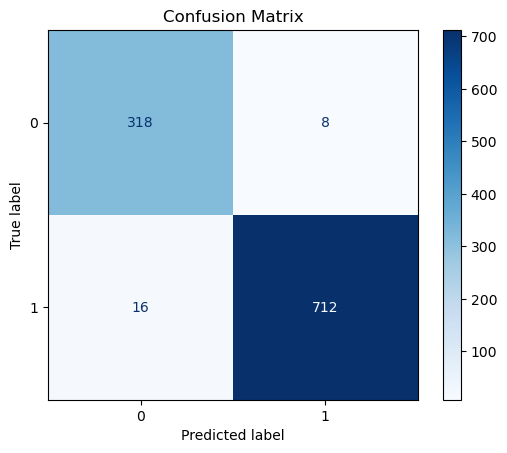

In [51]:
threshold = 0.5

X_nz = check_and_reorder_columns(X_saudi, X_nz)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_saudi = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.7,
    gamma=0,
    reg_lambda=3,
    reg_alpha=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the Saudi dataset
xgb_model_saudi.fit(X_saudi, y_saudi)

# Predict the outcomes on the nz dataset using predict_proba and threshold
y_proba_nz = xgb_model_saudi.predict_proba(X_nz)[:, 1]
y_pred_nz = (y_proba_nz >= threshold).astype(int)  # Using 0.5 as the threshold

# Evaluate the model
accuracy = accuracy_score(y_nz, y_pred_nz)
precision = precision_score(y_nz, y_pred_nz)
recall = recall_score(y_nz, y_pred_nz)
specificity = specificity_score(y_nz, y_pred_nz)
roc_auc = roc_auc_score(y_nz, y_proba_nz)  # Directly using the probability scores for ROC AUC

# Compute the standard deviations
conf_matrix = confusion_matrix(y_nz, y_pred_nz)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### 0.3 Threshold

Columns are the same.
Accuracy: 0.98 ± 0.00
Precision: 0.97 ± 0.01
Recall: 1.00 ± 0.00
Specificity: 0.93 ± 0.01
ROC-AUC: 1.00 ± 0.00
Confusion Matrix:
[[304  22]
 [  3 725]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:33] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


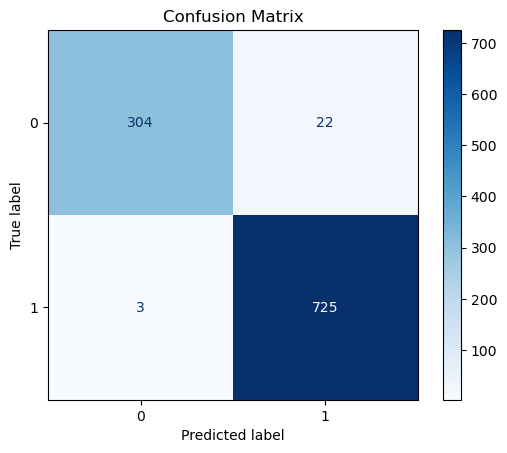

In [52]:
threshold = 0.3

X_nz = check_and_reorder_columns(X_saudi, X_nz)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_saudi = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.7,
    gamma=0,
    reg_lambda=3,
    reg_alpha=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the Saudi dataset
xgb_model_saudi.fit(X_saudi, y_saudi)

# Predict the outcomes on the nz dataset using predict_proba and threshold
y_proba_nz = xgb_model_saudi.predict_proba(X_nz)[:, 1]
y_pred_nz = (y_proba_nz >= threshold).astype(int)  # Using 0.3 as the threshold

# Evaluate the model
accuracy = accuracy_score(y_nz, y_pred_nz)
precision = precision_score(y_nz, y_pred_nz)
recall = recall_score(y_nz, y_pred_nz)
specificity = specificity_score(y_nz, y_pred_nz)
roc_auc = roc_auc_score(y_nz, y_proba_nz)  # Directly using the probability scores for ROC AUC

# Compute the standard deviations
conf_matrix = confusion_matrix(y_nz, y_pred_nz)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## 4-feature model

#### 0.5 Threshold

Columns are the same.
Accuracy: 0.88 ± 0.01
Precision: 0.92 ± 0.01
Recall: 0.90 ± 0.01
Specificity: 0.83 ± 0.01
ROC-AUC: 0.95 ± 0.04
Confusion Matrix:
[[272  54]
 [ 76 652]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:36] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


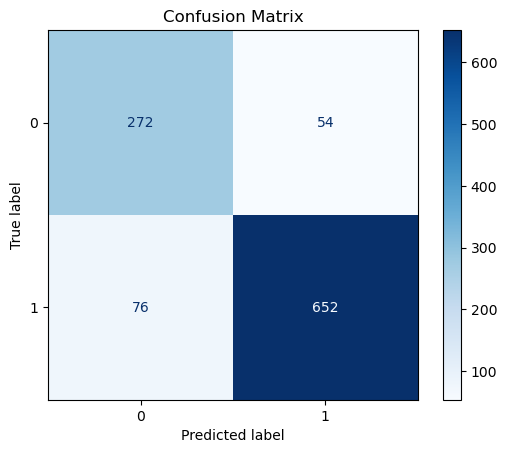

In [53]:
threshold = 0.5

X_saudi_10features = X_saudi.drop(['A10_Score', 'A7_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A1_Score', 'family_pdd', 'age_months', 'gender'], axis=1)
X_nz_10features = X_nz.drop(['A10_Score', 'A7_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A1_Score', 'family_pdd', 'age_months', 'gender'], axis=1)

X_nz_10features = check_and_reorder_columns(X_saudi_10features, X_nz_10features)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_saudi = XGBClassifier(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.01,
    subsample=1,
    colsample_bytree=0.7,
    gamma=0.3,
    reg_lambda=3,
    reg_alpha=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the Saudi dataset
xgb_model_saudi.fit(X_saudi_10features, y_saudi)

# Predict the outcomes on the nz dataset using predict_proba and applying a threshold of 0.5
y_proba_nz = xgb_model_saudi.predict_proba(X_nz_10features)[:, 1]
y_pred_nz = (y_proba_nz >= threshold).astype(int)  # Using 0.5 as the threshold

# Evaluate the model
accuracy = accuracy_score(y_nz, y_pred_nz)
precision = precision_score(y_nz, y_pred_nz)
recall = recall_score(y_nz, y_pred_nz)
specificity = specificity_score(y_nz, y_pred_nz)
roc_auc = roc_auc_score(y_nz, y_proba_nz)  # Using the probabilities for ROC AUC calculation

# Compute the standard deviations
conf_matrix = confusion_matrix(y_nz, y_pred_nz)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### 0.3 Threshold

Columns are the same.
Accuracy: 0.88 ± 0.01
Precision: 0.88 ± 0.01
Recall: 0.96 ± 0.01
Specificity: 0.70 ± 0.01
ROC-AUC: 0.95 ± 0.04
Confusion Matrix:
[[229  97]
 [ 30 698]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:39] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


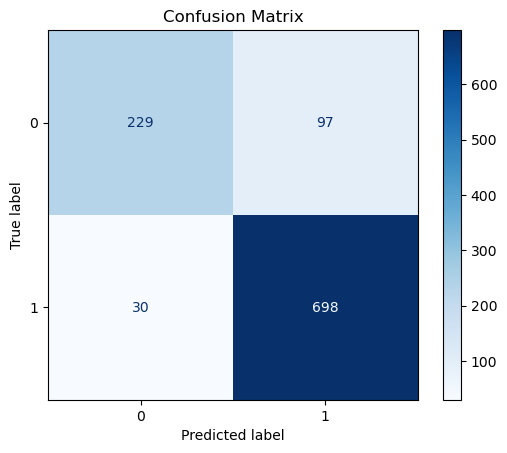

In [54]:
threshold = 0.3

X_saudi_10features = X_saudi.drop(['A10_Score', 'A7_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A1_Score', 'family_pdd', 'age_months', 'gender'], axis=1)
X_nz_10features = X_nz.drop(['A10_Score', 'A7_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A1_Score', 'family_pdd', 'age_months', 'gender'], axis=1)

X_nz_10features = check_and_reorder_columns(X_saudi_10features, X_nz_10features)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_saudi = XGBClassifier(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.01,
    subsample=1,
    colsample_bytree=0.7,
    gamma=0.3,
    reg_lambda=3,
    reg_alpha=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the Saudi dataset
xgb_model_saudi.fit(X_saudi_10features, y_saudi)

# Predict the outcomes on the nz dataset using predict_proba and applying a threshold of 0.3
y_proba_nz = xgb_model_saudi.predict_proba(X_nz_10features)[:, 1]
y_pred_nz = (y_proba_nz >= threshold).astype(int)  # Using 0.3 as the threshold

# Evaluate the model
accuracy = accuracy_score(y_nz, y_pred_nz)
precision = precision_score(y_nz, y_pred_nz)
recall = recall_score(y_nz, y_pred_nz)
specificity = specificity_score(y_nz, y_pred_nz)
roc_auc = roc_auc_score(y_nz, y_proba_nz)  # Using the probabilities for ROC AUC calculation

# Compute the standard deviations
conf_matrix = confusion_matrix(y_nz, y_pred_nz)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Final Test on Separate Dataset

## New Zealand Models

### Full featured model test on Polish dataset

#### 0.5 Threshold

Columns are not the same. Reordering...
Accuracy: 0.85 ± 0.02
Precision: 0.91 ± 0.03
Recall: 0.79 ± 0.03
Specificity: 0.91 ± 0.02
ROC-AUC: 0.94 ± 0.06
Confusion Matrix:
[[107  10]
 [ 28 107]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:44] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


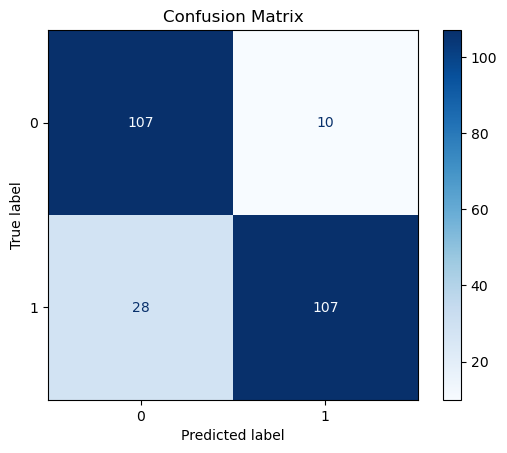

In [55]:
threshold = 0.5

X_polish = check_and_reorder_columns(X_nz, X_polish)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_nz = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.5,
    gamma=0.3,
    reg_lambda=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the nz dataset
xgb_model_nz.fit(X_nz, y_nz)

# Predict the probability outcomes on the Polish dataset
y_proba_polish = xgb_model_nz.predict_proba(X_polish)[:, 1]
y_pred_polish = (y_proba_polish >= threshold).astype(int)  # Using 0.5 as the classification threshold

# Evaluate the model
accuracy = accuracy_score(y_polish, y_pred_polish)
precision = precision_score(y_polish, y_pred_polish)
recall = recall_score(y_polish, y_pred_polish)
specificity = specificity_score(y_polish, y_pred_polish)
roc_auc = roc_auc_score(y_polish, y_proba_polish)  # Using the probability scores for ROC AUC

# Compute the standard deviations
conf_matrix = confusion_matrix(y_polish, y_pred_polish)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### 0.3 Threshold

Columns are the same.
Accuracy: 0.85 ± 0.02
Precision: 0.91 ± 0.03
Recall: 0.80 ± 0.03
Specificity: 0.91 ± 0.02
ROC-AUC: 0.94 ± 0.06
Confusion Matrix:
[[106  11]
 [ 27 108]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:48] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


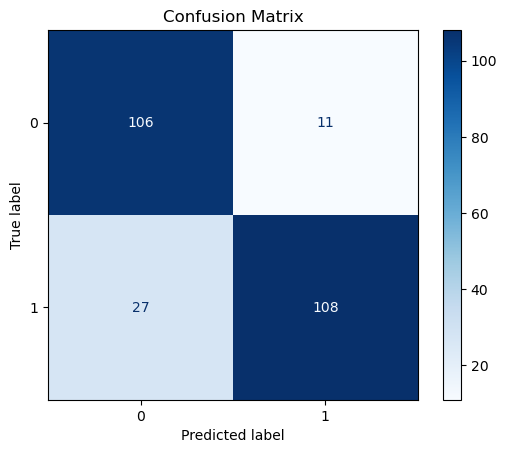

In [56]:
threshold = 0.3

X_polish = check_and_reorder_columns(X_nz, X_polish)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_nz = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.5,
    gamma=0.3,
    reg_lambda=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the nz dataset
xgb_model_nz.fit(X_nz, y_nz)

# Predict the probability outcomes on the Polish dataset
y_proba_polish = xgb_model_nz.predict_proba(X_polish)[:, 1]
y_pred_polish = (y_proba_polish >= threshold).astype(int)  # Using 0.3 as the classification threshold

# Evaluate the model
accuracy = accuracy_score(y_polish, y_pred_polish)
precision = precision_score(y_polish, y_pred_polish)
recall = recall_score(y_polish, y_pred_polish)
specificity = specificity_score(y_polish, y_pred_polish)
roc_auc = roc_auc_score(y_polish, y_proba_polish)  # Using the probability scores for ROC AUC

# Compute the standard deviations
conf_matrix = confusion_matrix(y_polish, y_pred_polish)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### 4-features model test on Polish dataset

#### 0.5 Threshold

Columns are the same.
Accuracy: 0.80 ± 0.03
Precision: 0.82 ± 0.04
Recall: 0.79 ± 0.03
Specificity: 0.80 ± 0.03
ROC-AUC: 0.85 ± 0.13
Confusion Matrix:
[[ 94  23]
 [ 28 107]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:51] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


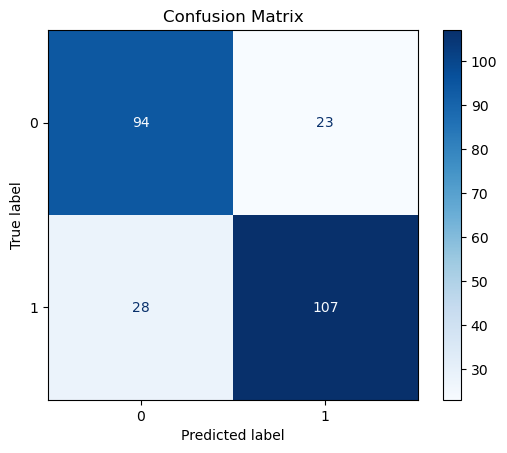

In [57]:
threshold = 0.5

X_nz_4features = X_nz.drop(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A8_Score', 'A10_Score', 'age_months', 'gender', 'family_pdd'], axis=1)
X_polish_4features = X_polish.drop(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A8_Score', 'A10_Score', 'age_months', 'gender', 'family_pdd'], axis=1)

X_polish_4features = check_and_reorder_columns(X_nz_4features, X_polish_4features)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_nz = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.5,
    gamma=0.3,
    reg_lambda=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the nz dataset
xgb_model_nz.fit(X_nz_4features, y_nz)

# Predict the probability outcomes on the Polish dataset
y_proba_polish = xgb_model_nz.predict_proba(X_polish_4features)[:, 1]
y_pred_polish = (y_proba_polish >= threshold).astype(int)  # Using 0.5 as the classification threshold

# Evaluate the model
accuracy = accuracy_score(y_polish, y_pred_polish)
precision = precision_score(y_polish, y_pred_polish)
recall = recall_score(y_polish, y_pred_polish)
specificity = specificity_score(y_polish, y_pred_polish)
roc_auc = roc_auc_score(y_polish, y_proba_polish)  # Using the probability scores for ROC AUC

# Compute the standard deviations
conf_matrix = confusion_matrix(y_polish, y_pred_polish)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### 0.3 Threshold

Columns are the same.
Accuracy: 0.72 ± 0.03
Precision: 0.68 ± 0.04
Recall: 0.91 ± 0.02
Specificity: 0.50 ± 0.03
ROC-AUC: 0.85 ± 0.13
Confusion Matrix:
[[ 58  59]
 [ 12 123]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:54] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


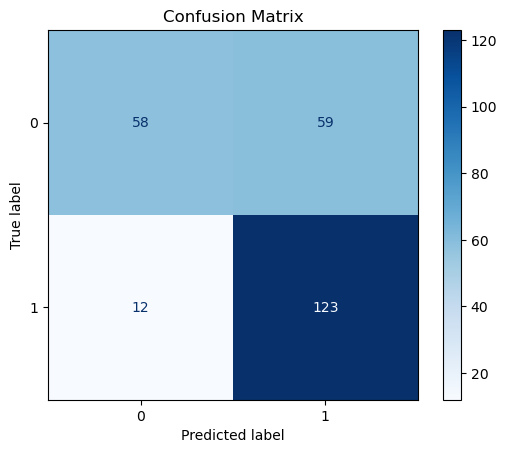

In [58]:
threshold = 0.3

X_nz_4features = X_nz.drop(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A8_Score', 'A10_Score', 'age_months', 'gender', 'family_pdd'], axis=1)
X_polish_4features = X_polish.drop(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A8_Score', 'A10_Score', 'age_months', 'gender', 'family_pdd'], axis=1)

X_polish_4features = check_and_reorder_columns(X_nz_4features, X_polish_4features)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_nz = XGBClassifier(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.3,
    subsample=0.8,
    colsample_bytree=0.5,
    gamma=0.3,
    reg_lambda=3,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the nz dataset
xgb_model_nz.fit(X_nz_4features, y_nz)

# Predict the probability outcomes on the Polish dataset
y_proba_polish = xgb_model_nz.predict_proba(X_polish_4features)[:, 1]
y_pred_polish = (y_proba_polish >= threshold).astype(int)  # Using 0.3 as the classification threshold

# Evaluate the model
accuracy = accuracy_score(y_polish, y_pred_polish)
precision = precision_score(y_polish, y_pred_polish)
recall = recall_score(y_polish, y_pred_polish)
specificity = specificity_score(y_polish, y_pred_polish)
roc_auc = roc_auc_score(y_polish, y_proba_polish)  # Using the probability scores for ROC AUC

# Compute the standard deviations
conf_matrix = confusion_matrix(y_polish, y_pred_polish)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Saudi models

### Full feature test on Polish dataset

#### 0.5 Threshold

Columns are the same.
Accuracy: 0.83 ± 0.02
Precision: 0.91 ± 0.03
Recall: 0.76 ± 0.03
Specificity: 0.91 ± 0.02
ROC-AUC: 0.93 ± 0.06
Confusion Matrix:
[[107  10]
 [ 33 102]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:57] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


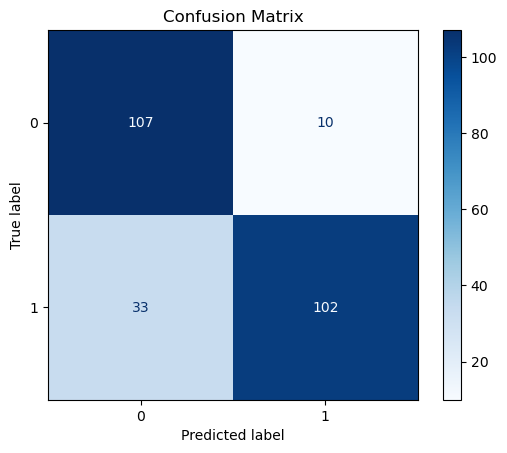

In [59]:
threshold = 0.5

X_saudi = check_and_reorder_columns(X_polish, X_saudi)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_saudi = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.7,
    gamma=0,
    reg_lambda=3,
    reg_alpha=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the Polish dataset
xgb_model_saudi.fit(X_saudi, y_saudi)

# Predict the probability outcomes on the Polish dataset
y_proba_polish = xgb_model_saudi.predict_proba(X_polish)[:, 1]
y_pred_polish = (y_proba_polish >= 0.5).astype(int)  # Convert probabilities to 0 or 1 based on the threshold of 0.5

# Evaluate the model
accuracy = accuracy_score(y_polish, y_pred_polish)
precision = precision_score(y_polish, y_pred_polish)
recall = recall_score(y_polish, y_pred_polish)
specificity = specificity_score(y_polish, y_pred_polish)
roc_auc = roc_auc_score(y_polish, y_proba_polish)  # Using the probability scores for ROC AUC

# Compute the standard deviations
conf_matrix = confusion_matrix(y_polish, y_pred_polish)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
conf_mat = confusion_matrix(y_polish, y_pred_polish)
print("Confusion Matrix:")
print(conf_mat)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### 0.3 Threshold

Columns are the same.
Accuracy: 0.84 ± 0.02
Precision: 0.89 ± 0.03
Recall: 0.79 ± 0.03
Specificity: 0.89 ± 0.02
ROC-AUC: 0.93 ± 0.06
Confusion Matrix:
[[104  13]
 [ 28 107]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:52:00] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


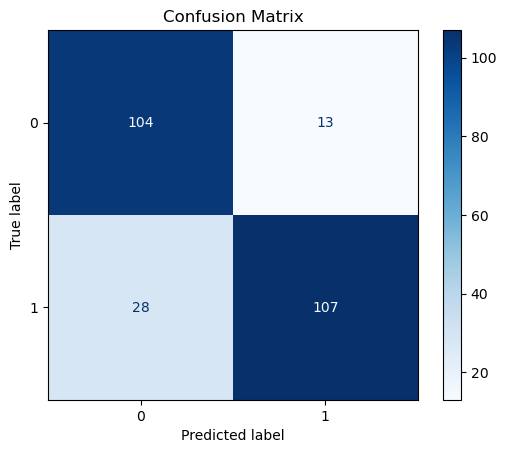

In [60]:
threshold = 0.3

X_saudi = check_and_reorder_columns(X_polish, X_saudi)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_saudi = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.7,
    gamma=0,
    reg_lambda=3,
    reg_alpha=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the Polish dataset
xgb_model_saudi.fit(X_saudi, y_saudi)

# Predict the probability outcomes on the Polish dataset
y_proba_polish = xgb_model_saudi.predict_proba(X_polish)[:, 1]
y_pred_polish = (y_proba_polish >= threshold).astype(int)  # Convert probabilities to 0 or 1 based on the threshold

# Evaluate the model
accuracy = accuracy_score(y_polish, y_pred_polish)
precision = precision_score(y_polish, y_pred_polish)
recall = recall_score(y_polish, y_pred_polish)
specificity = specificity_score(y_polish, y_pred_polish)
roc_auc = roc_auc_score(y_polish, y_proba_polish)  # Using the probability scores for ROC AUC

# Compute the standard deviations
conf_matrix = confusion_matrix(y_polish, y_pred_polish)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
conf_mat = confusion_matrix(y_polish, y_pred_polish)
print("Confusion Matrix:")
print(conf_mat)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

###  4 Feature Model on New Zealand Dataset

Columns are the same.
Accuracy: 0.79 ± 0.03
Precision: 0.85 ± 0.04
Recall: 0.74 ± 0.03
Specificity: 0.85 ± 0.02
ROC-AUC: 0.87 ± 0.11
Confusion Matrix:
[[ 99  18]
 [ 35 100]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:52:03] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


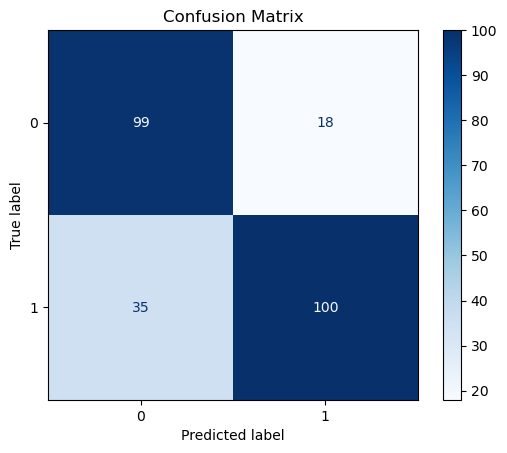

In [61]:
threshold = 0.5

# Drop age_months, gender, and family_pdd features from both datasets
X_saudi_4features = X_saudi.drop(['A10_Score', 'A7_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A1_Score', 'family_pdd', 'age_months', 'gender'], axis=1)
X_polish_4features = X_polish.drop(['A10_Score', 'A7_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A1_Score', 'family_pdd', 'age_months', 'gender'], axis=1)

# Reorder columns in X_saudi dataset
X_saudi_4features = check_and_reorder_columns(X_polish_4features, X_saudi_4features)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_saudi = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.7,
    gamma=0,
    reg_lambda=3,
    reg_alpha=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the Polish dataset
xgb_model_saudi.fit(X_saudi_4features, y_saudi)

# Predict the probability outcomes on the Polish dataset
y_proba_polish = xgb_model_saudi.predict_proba(X_polish_4features)[:, 1]
y_pred_polish = (y_proba_polish >= threshold).astype(int)  # Convert probabilities to 0 or 1 based on the threshold

# Evaluate the model
accuracy = accuracy_score(y_polish, y_pred_polish)
precision = precision_score(y_polish, y_pred_polish)
recall = recall_score(y_polish, y_pred_polish)
specificity = specificity_score(y_polish, y_pred_polish)
roc_auc = roc_auc_score(y_polish, y_proba_polish)  # Using the probability scores for ROC AUC

# Compute the standard deviations
conf_matrix = confusion_matrix(y_polish, y_pred_polish)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Columns are the same.
Accuracy: 0.82 ± 0.02
Precision: 0.83 ± 0.04
Recall: 0.84 ± 0.02
Specificity: 0.80 ± 0.03
ROC-AUC: 0.87 ± 0.11
Confusion Matrix:
[[ 94  23]
 [ 22 113]]


d:\Miniforge3\envs\ml\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:52:07] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


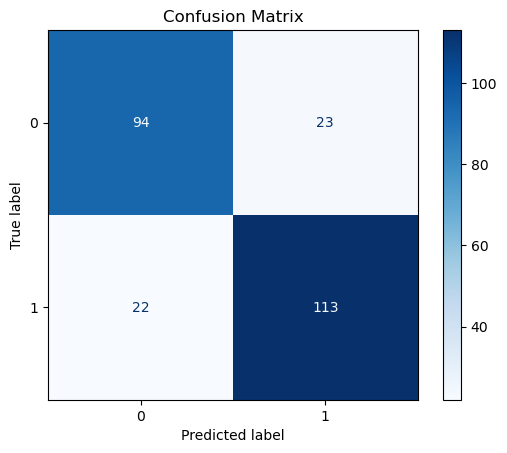

In [62]:
threshold = 0.3

# Drop age_months, gender, and family_pdd features from both datasets
X_saudi_4features = X_saudi.drop(['A10_Score', 'A7_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A1_Score', 'family_pdd', 'age_months', 'gender'], axis=1)
X_polish_4features = X_polish.drop(['A10_Score', 'A7_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A1_Score', 'family_pdd', 'age_months', 'gender'], axis=1)

# Reorder columns in X_saudi dataset
X_saudi_4features = check_and_reorder_columns(X_polish_4features, X_saudi_4features)

# Initialize the XGBoost model with relevant hyperparameters
xgb_model_saudi = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.7,
    gamma=0,
    reg_lambda=3,
    reg_alpha=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the Polish dataset
xgb_model_saudi.fit(X_saudi_4features, y_saudi)

# Predict the probability outcomes on the Polish dataset
y_proba_polish = xgb_model_saudi.predict_proba(X_polish_4features)[:, 1]
y_pred_polish = (y_proba_polish >= threshold).astype(int)  # Convert probabilities to 0 or 1 based on the threshold

# Evaluate the model
accuracy = accuracy_score(y_polish, y_pred_polish)
precision = precision_score(y_polish, y_pred_polish)
recall = recall_score(y_polish, y_pred_polish)
specificity = specificity_score(y_polish, y_pred_polish)
roc_auc = roc_auc_score(y_polish, y_proba_polish)  # Using the probability scores for ROC AUC

# Compute the standard deviations
conf_matrix = confusion_matrix(y_polish, y_pred_polish)
tn, fp, fn, tp = conf_matrix.ravel()
total = tn + fp + fn + tp
acc_std = np.sqrt((accuracy * (1 - accuracy)) / total)
prec_std = np.sqrt((precision * (1 - precision)) / tp)
rec_std = np.sqrt((recall * (1 - recall)) / total)
spec_std = np.sqrt((specificity * (1 - specificity)) / total)
roc_auc_std = roc_auc * (1 - roc_auc)

# Print the evaluation results with standard deviations
print(f"Accuracy: {accuracy:.2f} ± {acc_std:.2f}")
print(f"Precision: {precision:.2f} ± {prec_std:.2f}")
print(f"Recall: {recall:.2f} ± {rec_std:.2f}")
print(f"Specificity: {specificity:.2f} ± {spec_std:.2f}")
print(f"ROC-AUC: {roc_auc:.2f} ± {roc_auc_std:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix graphically
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()